<a href="https://colab.research.google.com/github/ImronRosada/Data_Science/blob/main/Zomato_Food_Delivery_Time_Operation_Analysis_with_Prediction_and_Classification_ImronRosada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imron Rosada<BR>
Data Science / Data Analysis<BR>
Zomato Food Delivery Time Operation Analysis with Prediction and Classification<BR>

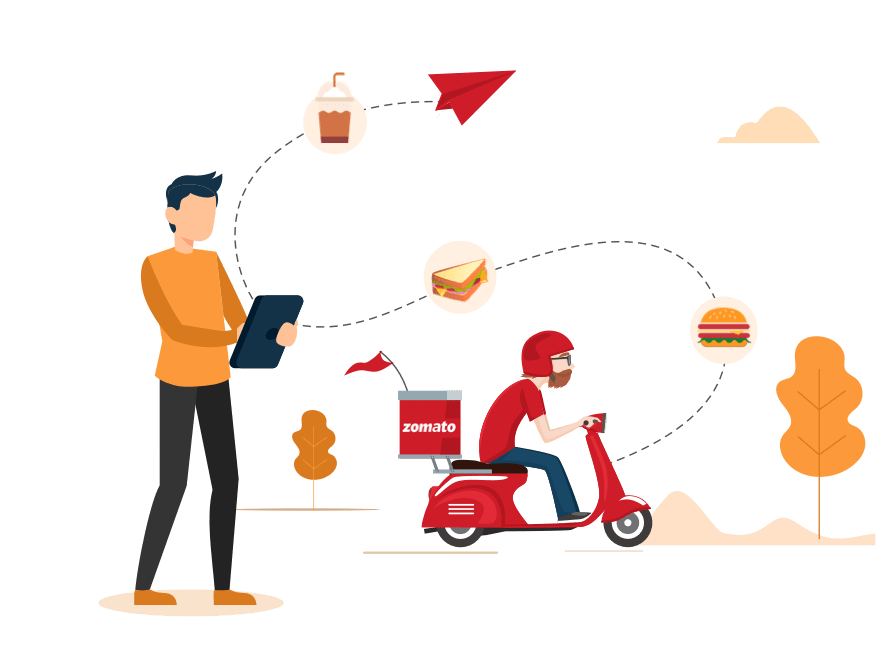

## `BUSINESS DATA UNDERSTANDING`

Mengeksplorasi data untuk mendapatkan wawasan awal serta memastikan kualitas data.

- Dataset ini memberikan gambaran komprehensif tentang operasi pengiriman makanan, mencakup informasi mengenai pengantar, waktu pemesanan, cuaca, lalu lintas, dan faktor lain yang mempengaruhi durasi pengiriman.

- Tujuan proyek ini adalah membangun dua model yang saling melengkapi. pertama, Memperkirakan durasi pengiriman makanan dalam satuan menit (**Regression**) dan klasifikasi untuk mendeteksi apakah sebuah pengiriman akan tergolong cepat atau lambat berdasarkan prediksi waktu antar (**Classification**)

- Diharapkan dapat meningkatkan efisiensi operasional pengiriman serta mendukung sistem peringatan dini untuk menjaga tingkat kepuasan pelanggan.

**Deskripsi Variabel**  

Dataset memiliki **45.584** entri dan **20** kolom, termasuk:

| **Nama Kolom**                 | **Deskripsi**                                                            |
|---------------------------------|-------------------------------------------------------------------------|
| **ID**                          | ID unik untuk setiap pengiriman atau pelanggan                           |
| **Delivery_person_ID**          | ID unik untuk setiap pengantar kurir atau driver                         |
| **Delivery_person_Age**         | Usia pengantar                                                           |
| **Delivery_person_Ratings**     | Rating yang diberikan kepada pengantar                                   |
| **Restaurant_latitude**         | Latitude restoran                                                        |
| **Restaurant_longitude**        | Longitude restoran                                                       |
| **Delivery_location_latitude**  | Latitude lokasi pengiriman                                               |
| **Delivery_location_longitude** | Longitude lokasi pengiriman                                              |
| **Order_Date**                  | Tanggal pesanan                                                          |
| **Time_Ordered**                | Waktu pesanan dibuat                                                     |
| **Time_Order_picked**           | Waktu pesanan diambil untuk pengiriman                                   |
| **Weather_conditions**          | Kondisi cuaca saat pengiriman                                            |
| **Road_traffic_density**        | Kepadatan lalu lintas saat pengiriman                                    |
| **Vehicle_condition**           | Kondisi kendaraan pengantar                                              |
| **Type_of_order**               | Jenis pesanan (misalnya, dine-in, takeaway, delivery)                    |
| **Type_of_vehicle**             | Jenis kendaraan yang digunakan untuk pengiriman                          |
| **multiple_deliveries**         | Indikator apakah pengiriman melibatkan beberapa pesanan dalam satu perjalanan |
| **Festival**                    | Indikator apakah pengiriman dilakukan pada saat festival                 |
| **City**                        | Kota tempat pengiriman dilakukan                                         |
| **Time_taken (min)**            | Waktu yang dibutuhkan untuk pengiriman dalam menit                        (`Variabel target`) |

Variabel **Time_taken (min)** merupakan target yang akan diprediksi.

Keduanya menggunakan waktu pengiriman (Time_taken) sebagai dasar, tapi model regresi memprediksi waktu secara langsung, sementara model klasifikasi mengelompokkan pengiriman ke dalam kategori.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# where is your data path
data_path = '/content/drive/My Drive/Colab Notebooks/Finpro-DS/Test Home Project/'

Mounted at /content/drive/


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
file_name = data_path + 'Zomato Dataset.csv'

In [ ]:
df = pd.read_csv(file_name)
df_zomato = df.copy()
df_zomato.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  multiple_deliveries Festival           City  Time_taken (min)
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2            30.327968             78.046106                   30.397968                    78.116106  12-02-2022       21:55             22:10                Fog                  Jam                  2         Snack      motorcycle                  3.0       No  Metropolitian                46
1  0xd987      KOCRES16DEL01                 21.0                      4.7            10.003064             76.307589                   10.043064                    76.347589  13-02-2022       14:55             15:05             Stormy                 High                  1          Meal      motorcycle                  1.0       No  Metropolitian                23
2  0x2784     PUNERES13DEL03                 23.0                      4.7            18.562450             73.916619                   18.652450                    74.006619  04-03-2022       17:30             17:40         Sandstorms               Medium                  1        Drinks         scooter                  1.0       No  Metropolitian                21
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3            30.899584             75.809346                   30.919584                    75.829346  13-02-2022       09:20             09:30         Sandstorms                  Low                  0        Buffet      motorcycle                  0.0       No  Metropolitian                20
4  0xdb64      KNPRES14DEL02                 24.0                      4.7            26.463504             80.372929                   26.593504                    80.502929  14-02-2022       19:50             20:05                Fog                  Jam                  1         Snack         scooter                  1.0       No  Metropolitian                41

## `DATA PREPARATION`

Langkah-langkah yang dilakukan untuk memastikan data siap digunakan dalam analisis atau pembuatan model.

In [ ]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

- Time_Orderd (object): Ini adalah waktu dalam format string, sebaiknya diubah menjadi tipe data datetime64 untuk memudahkan analisis dan operasi berbasis waktu.
- Time_Order_picked (object): Sama seperti Time_Orderd, sebaiknya diubah menjadi datetime64 karena ini adalah waktu yang juga perlu diproses dalam bentuk datetime.
- Order_Date (object): Ini juga seharusnya diubah menjadi datetime64 untuk mempermudah analisis berdasarkan tanggal.
- multiple_deliveries (float64): Jika nilai ini hanya berupa angka bulat (seperti 1, 2, dll), sebaiknya diubah menjadi tipe data int64 agar lebih sesuai.

In [ ]:
# 1. Ubah Order_Date ke datetime
df_zomato['Order_Date'] = pd.to_datetime(df_zomato['Order_Date'], format='%d-%m-%Y')

# 2. Ubah Time_Orderd dan Time_Order_picked ke datetime
df_zomato['Time_Orderd'] = pd.to_datetime(df_zomato['Order_Date'].dt.strftime('%Y-%m-%d') + ' ' + df_zomato['Time_Orderd'], errors='coerce')
df_zomato['Time_Order_picked'] = pd.to_datetime(df_zomato['Order_Date'].dt.strftime('%Y-%m-%d') + ' ' + df_zomato['Time_Order_picked'], errors='coerce')

# 3. Ubah multiple_deliveries ke int setelah isi NaN dengan 0
df_zomato['multiple_deliveries'] = df_zomato['multiple_deliveries'].fillna(0).astype(int)

In [ ]:
df_zomato[['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'multiple_deliveries']].head()

Order_Date         Time_Orderd   Time_Order_picked  multiple_deliveries
0 2022-02-12 2022-02-12 21:55:00 2022-02-12 22:10:00                    3
1 2022-02-13 2022-02-13 14:55:00 2022-02-13 15:05:00                    1
2 2022-03-04 2022-03-04 17:30:00 2022-03-04 17:40:00                    1
3 2022-02-13 2022-02-13 09:20:00 2022-02-13 09:30:00                    0
4 2022-02-14 2022-02-14 19:50:00 2022-02-14 20:05:00                    1

In [ ]:
df_zomato.dtypes

ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                   float64
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                     datetime64[ns]
Time_Orderd                    datetime64[ns]
Time_Order_picked              datetime64[ns]
Weather_conditions                     object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                     int64
Festival                               object
City                                   object
Time_taken (min)                        int64
dtype: object

In [ ]:
# Numerik (Int dan Float)
numerik = ['Delivery_person_Age', 'Delivery_person_Ratings',
           'Restaurant_latitude', 'Restaurant_longitude',
           'Delivery_location_latitude', 'Delivery_location_longitude',
           'Vehicle_condition', 'multiple_deliveries',
           'Time_taken (min)']

# Kategorik(object, string, datetime)
kategorik = ['ID', 'Delivery_person_ID', 'Weather_conditions',
             'Road_traffic_density', 'Type_of_order',
             'Type_of_vehicle', 'Festival', 'City',
             'Order_Date', 'Time_Orderd', 'Time_Order_picked']

### Duplicate Handling

In [ ]:
len(df_zomato.drop_duplicates()) / len(df_zomato)

1.0

In [ ]:
duplicates = df_zomato[df_zomato.duplicated(keep=False)]
print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


Empty DataFrame
Columns: [ID, Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Order_Date, Time_Orderd, Time_Order_picked, Weather_conditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, multiple_deliveries, Festival, City, Time_taken (min)]
Index: []

Nilai pada tabel `kosong` menandakan tidak ada baris yang duplikat

### Missing Value Handling

In [ ]:
df_zomato[df_zomato.isna().any(axis=1)]

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude Order_Date         Time_Orderd   Time_Order_picked Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  multiple_deliveries Festival           City  Time_taken (min)
28     0x6531      SURRES08DEL01                 20.0                      4.8            21.173343             72.792731                   21.183343                    72.802731 2022-03-30                 NaT 2022-03-30 11:10:00         Sandstorms                  Low                  2          Meal         scooter                    1       No  Metropolitian                19
31     0x9b18     BANGRES17DEL01                 22.0                      4.8            12.972532             77.608179                   13.042532                    77.678179 2022-03-18                 NaT 2022-03-18 23:10:00                Fog                  Low                  1         Snack      motorcycle                    1       No  Metropolitian                28
33      0x4f0      MUMRES17DEL02                  NaN                      NaN            19.121999             72.908493                   19.201999                    72.988493 2022-04-06                 NaT 2022-04-06 18:35:00             Cloudy               Medium                  1        Drinks         scooter                    1       No  Metropolitian                33
36     0xc644      KOLRES16DEL02                 37.0                      4.9            22.539129             88.365507                   22.559129                    88.385507 2022-02-13 2022-02-13 10:55:00                 NaT                Fog                  Low                  1         Snack         scooter                    1       No          Urban                16
38     0x63b6     BANGRES05DEL03                 27.0                      4.9            12.970324             77.645748                   13.030324                    77.705748 2022-03-19                 NaT 2022-03-19 19:15:00              Windy               Medium                  1        Drinks         scooter                    1       No  Metropolitian                25
...       ...                ...                  ...                      ...                  ...                   ...                         ...                          ...        ...                 ...                 ...                ...                  ...                ...           ...             ...                  ...      ...            ...               ...
45566  0x91d5      HYDRES03DEL03                 34.0                      4.9            17.422819             78.449578                   17.482819                    78.509578 2022-03-24 2022-03-24 21:45:00                 NaT             Stormy                  Jam                  1          Meal      motorcycle                    1       No  Metropolitian                28
45571  0xbb2b      MYSRES08DEL02                 34.0                      4.9            12.297954             76.665169                   12.317954                    76.685169 2022-04-05 2022-04-05 09:10:00 2022-04-05 09:15:00         Sandstorms                  Low                  1         Snack         scooter                    1       No            NaN                26
45573  0x59ae     PUNERES13DEL02                 30.0                      4.6            18.562450             73.916619                   18.582450                    73.936619 2022-04-01                 NaT 2022-04-01 09:15:00             Cloudy                  Low                  0          Meal      motorcycle                    0       No  Metropolitian                20
45577  0x4e21     BANGRES16DEL03                 28.0                      4.9            13.029198             77.570997                   13.059198                    77.600997 2022-03-30 2

In [ ]:
total_rows = len(df_zomato)

for column in df_zomato.columns:
   # if column != 'customerID':
        missing_count = df_zomato[column].isna().sum()
        missing_percentage = (missing_count / total_rows) * 100
        print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'ID' Has 0 missing values (0.00%)
Column 'Delivery_person_ID' Has 0 missing values (0.00%)
Column 'Delivery_person_Age' Has 1854 missing values (4.07%)
Column 'Delivery_person_Ratings' Has 1908 missing values (4.19%)
Column 'Restaurant_latitude' Has 0 missing values (0.00%)
Column 'Restaurant_longitude' Has 0 missing values (0.00%)
Column 'Delivery_location_latitude' Has 0 missing values (0.00%)
Column 'Delivery_location_longitude' Has 0 missing values (0.00%)
Column 'Order_Date' Has 0 missing values (0.00%)
Column 'Time_Orderd' Has 5799 missing values (12.72%)
Column 'Time_Order_picked' Has 5007 missing values (10.98%)
Column 'Weather_conditions' Has 616 missing values (1.35%)
Column 'Road_traffic_density' Has 601 missing values (1.32%)
Column 'Vehicle_condition' Has 0 missing values (0.00%)
Column 'Type_of_order' Has 0 missing values (0.00%)
Column 'Type_of_vehicle' Has 0 missing values (0.00%)
Column 'multiple_deliveries' Has 0 missing values (0.00%)
Column 'Festival' Has 228

In [ ]:
df_missing_text = df_zomato.select_dtypes(include=['object', 'float64', 'datetime64', 'int64', 'int32']).melt(var_name="Column", value_name="Tipe")
df_missing_text = df_missing_text[df_missing_text["Tipe"].isna()].copy()
df_missing_text["Missing Type"] = df_missing_text["Tipe"].apply(lambda x: "NaN" if isinstance(x, float) and np.isnan(x) else "NaT" if pd.isna(x) else "Unknown")
df_missing_text = (df_missing_text.groupby(["Column", "Missing Type"]).size().reset_index(name="Amount"))
df_missing_text["Percentage (%)"] = ((df_missing_text["Amount"] / len(df_zomato)) * 100).map(lambda x: f"{x:.2f}%")
df_missing_text = df_missing_text.sort_values(by="Amount", ascending=False).reset_index(drop=True)
df_missing_text

Column Missing Type  Amount Percentage (%)
0              Time_Orderd          NaT    5799         12.72%
1        Time_Order_picked          NaT    5007         10.98%
2  Delivery_person_Ratings          NaN    1908          4.19%
3      Delivery_person_Age          NaN    1854          4.07%
4                     City          NaN    1200          2.63%
5       Weather_conditions          NaN     616          1.35%
6     Road_traffic_density          NaN     601          1.32%
7                 Festival          NaN     228          0.50%

Terdeteksi sebagai missing values berbasis teks (**NaT**, **NaN**)

Aturan missing value handling :
1. jika tipe datanya numerik -> handling menggunakan median (robust / tahan terhadap outlier)
2. jika tipe datanya kategorik / object / string -> handling menggunakan mode / modus karena merepresentasikan kategori yang paling umum atau sering muncul sehingga dapat mempertahankan distribusi kategori.
3. Jika tipe datanya datetime -> handling dilakukan dengan menggunakan median sama seperti data numerik karena datetime dapat diurutkan secara alami artinya ada urutan waktu yang jelas: tahun, bulan, hari, jam, menit, detik. sehingga median dapat merepresentasikan nilai tengah lebih akurat.

In [ ]:
# Menghitung median untuk kolom numerik dan datetime
median_values = df_zomato[['Time_Orderd', 'Time_Order_picked', 'Delivery_person_Ratings', 'Delivery_person_Age']].median()

In [ ]:
# Mengganti nilai yang hilang dengan median untuk setiap kolom
df_zomato['Time_Orderd'] = df_zomato['Time_Orderd'].apply(lambda x: median_values['Time_Orderd'] if pd.isna(x) or x == 'NaT' else x)
df_zomato['Time_Order_picked'] = df_zomato['Time_Order_picked'].apply(lambda x: median_values['Time_Order_picked'] if pd.isna(x) or x == 'NaT' else x)
df_zomato['Delivery_person_Ratings'] = df_zomato['Delivery_person_Ratings'].apply(lambda x: median_values['Delivery_person_Ratings'] if pd.isna(x) or x == 'NaN' else x)
df_zomato['Delivery_person_Age'] = df_zomato['Delivery_person_Age'].apply(lambda x: median_values['Delivery_person_Age'] if pd.isna(x) or x == 'NaN' else x)

In [ ]:
# Menghitung modus untuk kolom kategorik
mode_values = df_zomato[['City', 'Weather_conditions', 'Road_traffic_density', 'Festival']].mode().iloc[0]

In [ ]:
# Mengganti nilai yang hilang (termasuk 'NaT' dan 'NaN' teks) dengan modus untuk kolom kategorik
df_zomato['City'] = df_zomato['City'].apply(lambda x: mode_values['City'] if pd.isna(x) or x == 'NaN' or x == 'NaT' else x)
df_zomato['Weather_conditions'] = df_zomato['Weather_conditions'].apply(lambda x: mode_values['Weather_conditions'] if pd.isna(x) or x == 'NaN' or x == 'NaT' else x)
df_zomato['Road_traffic_density'] = df_zomato['Road_traffic_density'].apply(lambda x: mode_values['Road_traffic_density'] if pd.isna(x) or x == 'NaN' or x == 'NaT' else x)
df_zomato['Festival'] = df_zomato['Festival'].apply(lambda x: mode_values['Festival'] if pd.isna(x) or x == 'NaN' or x == 'NaT' else x)

In [ ]:
# menggunakan isna, isnull, dan sum
df_zomato.isna().sum()
# df_zomato.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

Semua kolom memiliki 0 missing values, imputasi atau penanganan missing values telah berhasil dilakukan.

### Outlier Handling


In [ ]:
from scipy import stats
def check_plot(df_zomato, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_zomato[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_zomato[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_zomato[variable])
    plt.title('Boxplot')
    plt.show()

In [ ]:
print(numerik)

['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)']


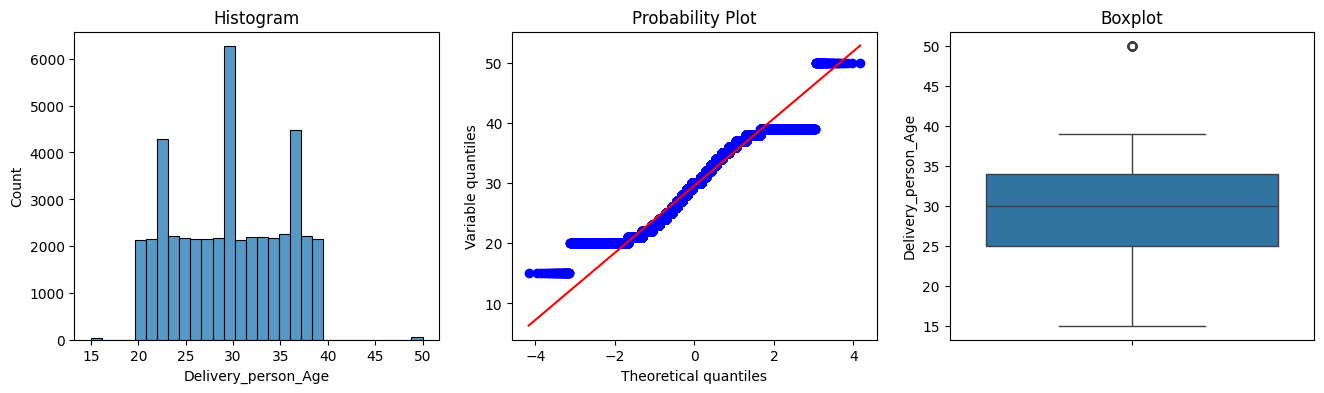

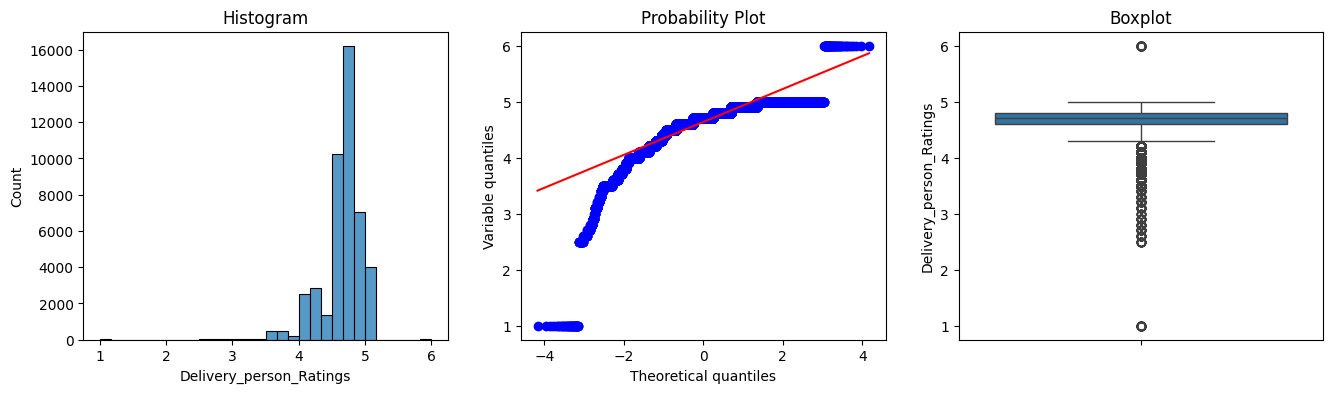

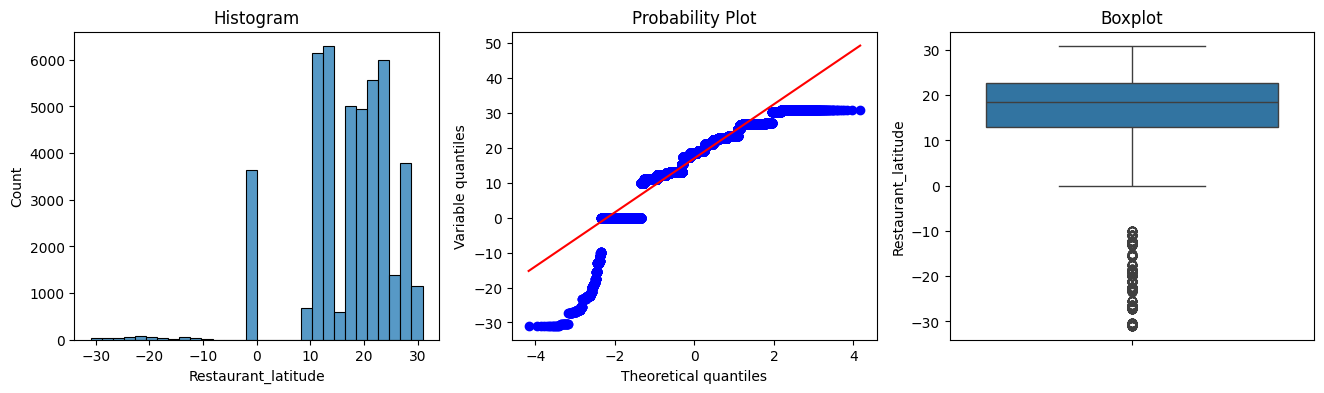

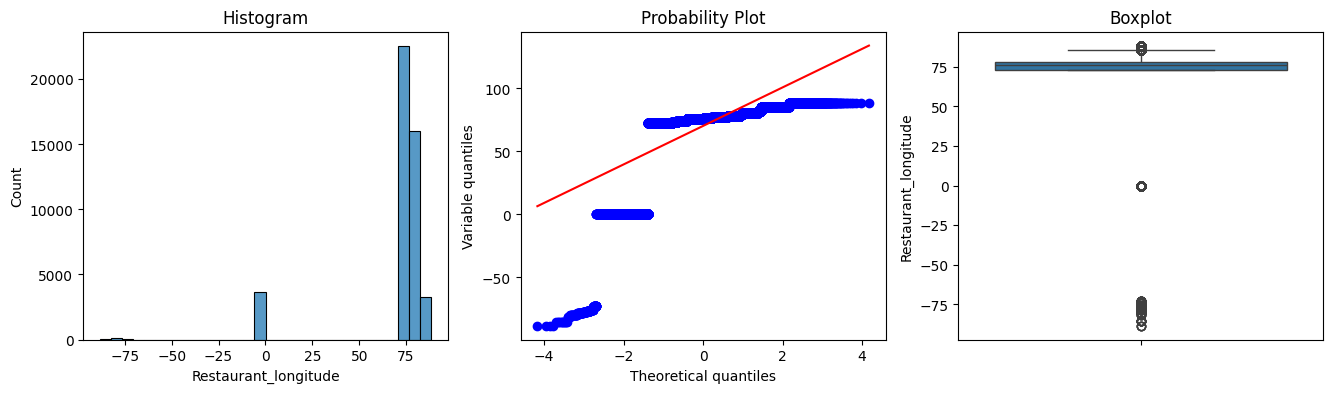

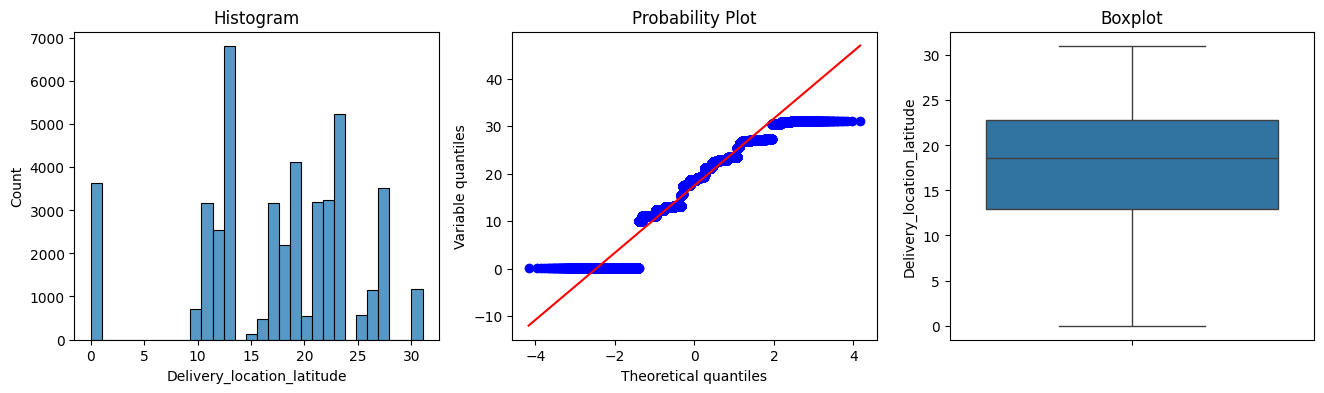

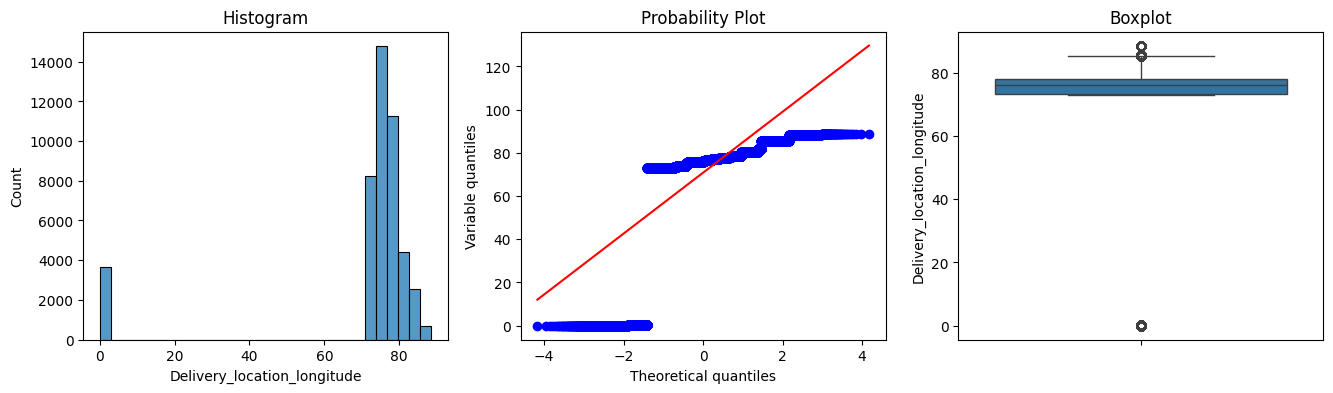

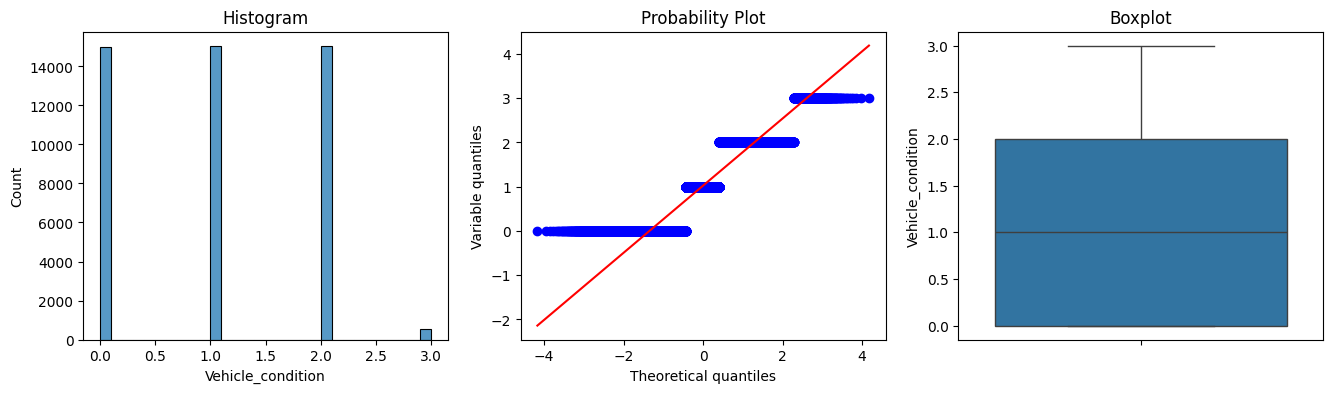

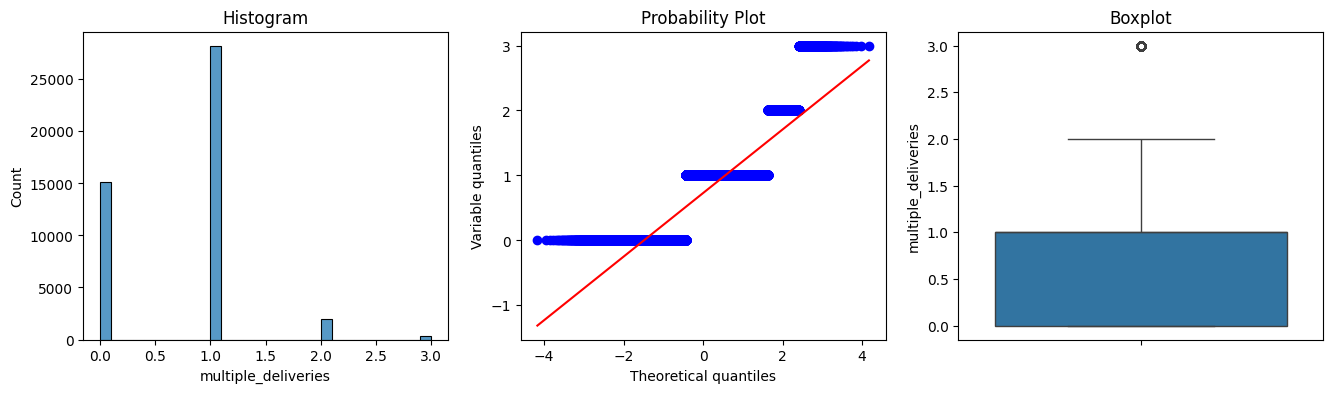

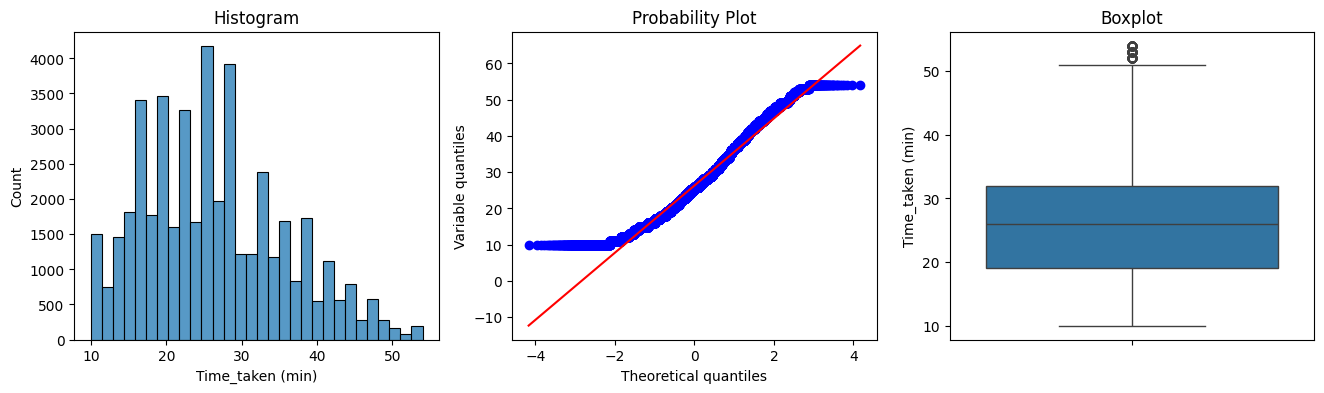

In [ ]:
# Memvisualisasikan outlier
for kolom in ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)']:
    df_zomato = df_zomato.copy()
    check_plot(df_zomato, kolom)

In [ ]:
def calc_outliers(df_zomato, column):
    q1 = df_zomato[column].quantile(0.25)
    q3 = df_zomato[column].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr

    print(f"\n[{column}]")
    print(f"Q1: {q1:.2f}, Median: {df_zomato[column].median():.2f}, Q3: {q3:.2f}")
    print(f"Upper Fence: {upper_fence:.2f}, Lower Fence: {lower_fence:.2f}")
    print(f"Min: {df_zomato[column].min():.2f}, Max: {df_zomato[column].max():.2f}")

    outliers_upper = df_zomato[df_zomato[column] > upper_fence][column]
    outliers_lower = df_zomato[df_zomato[column] < lower_fence][column]

    print(f"Outliers di atas Upper Fence: {list(outliers_upper)}")
    print(f"Outliers di bawah Lower Fence: {list(outliers_lower)}")

# Daftar kolom yang akan dicek
columns_to_check = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)']

for col in columns_to_check:
    calc_outliers(df_zomato, col)


[Delivery_person_Age]
Q1: 25.00, Median: 30.00, Q3: 34.00
Upper Fence: 47.50, Lower Fence: 11.50
Min: 15.00, Max: 50.00
Outliers di atas Upper Fence: [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
Outliers di bawah Lower Fence: []

[Delivery_person_Ratings]
Q1: 4.60, Median: 4.70, Q3: 4.80
Upper Fence: 5.10, Lower Fence: 4.30
Min: 1.00, Max: 6.00
Outliers di atas Upper Fence: [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
Outliers di bawah Lower Fence: [4.2, 4.0, 4.2, 4.1, 4.0, 4.0, 4.1, 3.5, 4.2, 4.1, 

Z-score memberikan gambaran seberapa jauh data dari rata-rata dan membantu kita mengetahui apakah data tersebut perlu diperiksa lebih lanjut atau tidak.

In [ ]:
def check_outliers_zscore(df, column, window=100, threshold=2.5):
    df["rolling_mean"] = df[column].rolling(window=window, center=True).mean()
    df["rolling_std"] = df[column].rolling(window=window, center=True).std()

    df["z_score"] = (df[column] - df["rolling_mean"]) / df["rolling_std"]

    outliers = df[(df["z_score"].abs() > threshold)]
    print(f"\n[{column}]")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[column, "z_score"]].head())

for col in ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)']:
    check_outliers_zscore(df_zomato, col)


[Delivery_person_Age]
Jumlah outlier: 68
      Delivery_person_Age   z_score
3577                 50.0  3.401910
4705                 50.0  3.681116
5160                 50.0  3.329847
5353                 50.0  3.068010
5642                 50.0  3.683125

[Delivery_person_Ratings]
Jumlah outlier: 1236
     Delivery_person_Ratings   z_score
104                      3.8 -3.412853
139                      3.9 -2.682337
175                      3.9 -2.549219
198                      3.9 -2.742420
279                      3.8 -3.307408

[Restaurant_latitude]
Jumlah outlier: 703
     Restaurant_latitude   z_score
83            -27.163303 -5.054716
214             0.000000 -2.534091
274           -27.165108 -4.617339
280           -18.551440 -3.720482
416           -30.366322 -5.064658

[Restaurant_longitude]
Jumlah outlier: 3167
    Restaurant_longitude   z_score
50                   0.0 -2.954337
58                   0.0 -2.951949
59                   0.0 -2.950016
63                   0

In [ ]:
# drop kolom feature
df_zomato = df_zomato.drop(columns=['rolling_mean', 'rolling_std', 'z_score'])

| **Variabel**                        | **Penanganan**           | **Justifikasi**                                                                 |
|-------------------------------------|--------------------------|---------------------------------------------------------------------------------|
| **Delivery_person_Age**             | Masih Valid              | Usia 15-50 tahun masih dalam batas wajar untuk pengantar makanan, meskipun usia 15 perlu verifikasi lebih lanjut. |
| **Delivery_person_Ratings**         | Masih Valid              | Rating 1 dan 6 adalah nilai yang jarang, namun masih masuk akal selama tidak mencapai nilai ekstrem (misalnya 6666 atau -100000). Perlu verifikasi jika ada kesalahan input, tetapi secara umum bisa diterima. |
| **Restaurant_latitude**             | Perlu Ditinjau           | Koordinat restoran yang ekstrem (misalnya -30.91) perlu diperiksa lebih lanjut untuk validitasnya, karena lokasi yang jauh dari area restoran biasa. |
| **Restaurant_longitude**            | Perlu Ditinjau           | Koordinat restoran dengan nilai ekstrem seperti -88.37 perlu diperiksa lebih lanjut karena kemungkinan kesalahan input atau lokasi yang tidak valid. |
| **Delivery_location_latitude**      | Masih Valid              | Nilai latitude 31.05 masih dapat diterima sebagai lokasi yang valid, meskipun perlu dipastikan apakah ada kesalahan input. |
| **Delivery_location_longitude**     | Masih Valid              | Nilai longitude 88.56 berada di area yang valid, namun tetap perlu memeriksa distribusi data untuk mengidentifikasi kesalahan input. |
| **Vehicle_condition**               | Masih Valid              | Kondisi kendaraan yang terdaftar (0-3) masuk akal, meskipun kondisi kendaraan 3 (sangat buruk) bisa dianggap sebagai outlier, perlu verifikasi lebih lanjut. |
| **multiple_deliveries**             | Masih Valid              | Pengantaran lebih dari satu barang (hingga 3) masih masuk akal, meskipun frekuensi yang sangat tinggi perlu diperhatikan. |
| **Time_taken (min)**                | Perlu Ditinjau           | Waktu pengiriman 54 menit bisa menjadi outlier jika jaraknya tidak jauh, perlu verifikasi apakah ada kesalahan data atau pengiriman jarak jauh yang wajar. |


In [ ]:
# Cek rentang nilai latitude dan longitude yang valid
df_zomato['restaurant_latitude_valid'] = df_zomato['Restaurant_latitude'].between(-90, 90)
df_zomato['restaurant_longitude_valid'] = df_zomato['Restaurant_longitude'].between(-180, 180)

# Hitung persentase data yang valid
valid_latitude_percentage = df_zomato['restaurant_latitude_valid'].mean() * 100
valid_longitude_percentage = df_zomato['restaurant_longitude_valid'].mean() * 100

print(f'Persentase latitude valid: {valid_latitude_percentage}%')
print(f'Persentase longitude valid: {valid_longitude_percentage}%')

Persentase latitude valid: 100.0%
Persentase longitude valid: 100.0%


Latitude (Garis Lintang): Rentangnya adalah dari -90° (kutub selatan) hingga 90° (kutub utara).
- Nilai valid: antara -90 dan 90.
- Nilai tidak valid: jika lebih kecil dari -90 atau lebih besar dari 90.

Longitude (Garis Bujur): Rentangnya adalah dari -180° (garis bujur barat) hingga 180° (garis bujur timur).
- Nilai valid: antara -180 dan 180.
- Nilai tidak valid: jika lebih kecil dari -180 atau lebih besar dari 180.

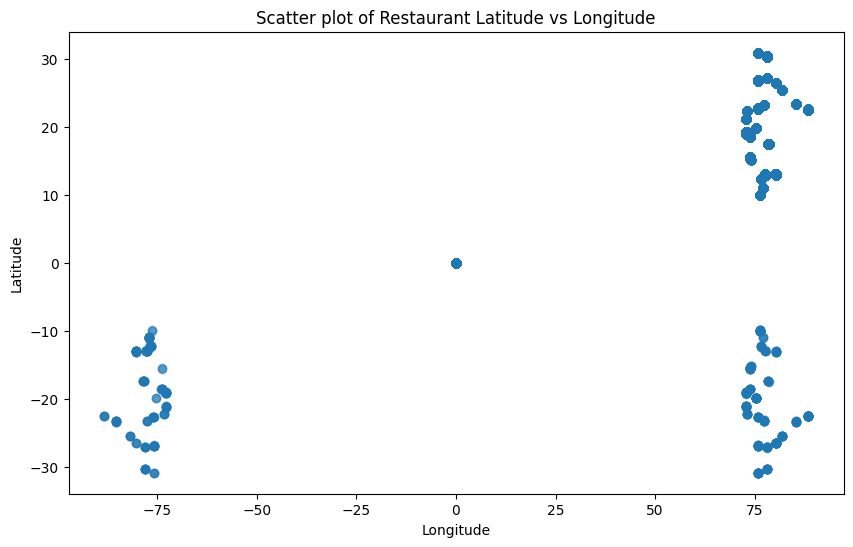

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_zomato['Restaurant_longitude'], df_zomato['Restaurant_latitude'], alpha=0.5)
plt.title('Scatter plot of Restaurant Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# drop kolom feature
df_zomato = df_zomato.drop(columns=['restaurant_latitude_valid', 'restaurant_longitude_valid'])

In [ ]:
# Cek outlier pada Time_taken (min)
Q1 = df_zomato['Time_taken (min)'].quantile(0.25)
Q3 = df_zomato['Time_taken (min)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan outlier
outliers = df_zomato[(df_zomato['Time_taken (min)'] < lower_bound) | (df_zomato['Time_taken (min)'] > upper_bound)]
print("Beberapa data outlier untuk Time_taken (min):")
print(outliers[['Time_taken (min)']].head())

Beberapa data outlier untuk Time_taken (min):
     Time_taken (min)
34                 52
179                54
257                53
632                54
713                53


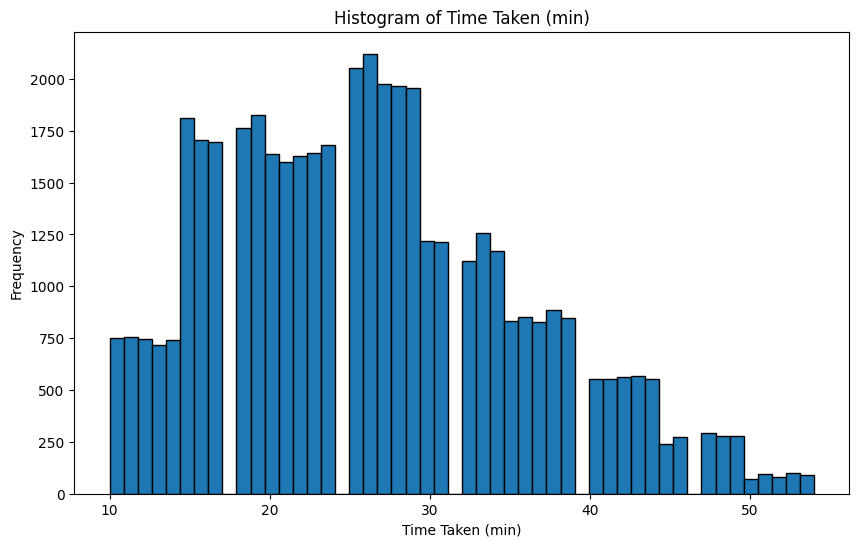

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Time_taken (min)'], bins=50, edgecolor='black')
plt.title('Histogram of Time Taken (min)')
plt.xlabel('Time Taken (min)')
plt.ylabel('Frequency')
plt.show()

Nilai waktu pengiriman seperti 52, 53, dan 54 menit masih berada dalam rentang yang tidak terlalu ekstrem jika dibandingkan dengan sebagian besar data. Meskipun nilai-nilai ini sedikit lebih tinggi, tetapi tidak jauh dari rata-rata. Dengan kata lain, hanya sedikit data yang melebihi 50 menit, jadi kemungkinan besar ini adalah nilai yang valid.

### Feature Engineering

In [ ]:
!pip install geopy

In [ ]:
from geopy.distance import geodesic

In [ ]:
# Ekstraksi fitur waktu
df_zomato['day_of_week'] = df_zomato['Order_Date'].dt.dayofweek  # Hari dalam minggu (0 = Senin, 6 = Minggu)
df_zomato['hour_of_day'] = df_zomato['Time_Orderd'].dt.hour  # Jam dalam sehari
df_zomato['waiting_time'] = (df_zomato['Time_Order_picked'] - df_zomato['Time_Orderd']).dt.total_seconds() / 60  # Waktu tunggu dalam menit

# Hitung jarak antara restoran dan lokasi pengiriman (dalam km)
coords = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']# Ubah semua koordinat menjadi nilai absolut dan hitung jarak
df_zomato[coords] = df_zomato[coords].abs()
df_zomato['distance_km'] = df_zomato.apply(lambda row: geodesic((row['Restaurant_latitude'], row['Restaurant_longitude']), (row['Delivery_location_latitude'], row['Delivery_location_longitude'])).km, axis=1)

# Encode kepadatan lalu lintas
mapping_traffic = {'Low': 1, 'Medium': 2, 'High': 3, 'Jam': 3}  # Jika ada kategori 'Jam' sebagai macet
df_zomato['traffic_density_score'] = df_zomato['Road_traffic_density'].map(mapping_traffic)

# fitur weather_traffic_interaction berdasarkan kondisi cuaca dan kepadatan lalu lintas
df_zomato['weather_traffic_interaction'] = df_zomato.apply(lambda row: row['traffic_density_score'] * 1.5 if row['Weather_conditions'] == 'Fog' else
row['traffic_density_score'] * 1.8 if row['Weather_conditions'] == 'Stormy' else row['traffic_density_score'] * 1.2 if row['Weather_conditions'] in ['Cloudy', 'Sandstorms', 'Windy', 'Sunny'] else 0, axis=1)

# Binning untuk klasifikasi cepat/lambat (contoh threshold 30 menit)
df_zomato['delivery_speed_category'] = df_zomato['Time_taken (min)'].apply(lambda x: 'Fast Delivery' if x <= 30 else 'Slow Delivery')

# Hitung kolom kecepatan (km/h)
df_zomato['Speed_kmph'] = (df_zomato['distance_km'] / df_zomato['Time_taken (min)']) * 60

In [ ]:
df_zomato['Road_traffic_density'] = df_zomato['Road_traffic_density'].replace({'Jam': 'Very High'})

In [ ]:
df_zomato.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude Order_Date         Time_Orderd   Time_Order_picked Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  multiple_deliveries Festival           City  Time_taken (min)  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  weather_traffic_interaction delivery_speed_category  Speed_kmph
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2            30.327968             78.046106                   30.397968                    78.116106 2022-02-12 2022-02-12 21:55:00 2022-02-12 22:10:00                Fog            Very High                  2         Snack      motorcycle                    3       No  Metropolitian                46            5           21          15.0    10.271464                      3                          4.5           Slow Delivery   13.397562
1  0xd987      KOCRES16DEL01                 21.0                      4.7            10.003064             76.307589                   10.043064                    76.347589 2022-02-13 2022-02-13 14:55:00 2022-02-13 15:05:00             Stormy                 High                  1          Meal      motorcycle                    1       No  Metropolitian                23            6           14          10.0     6.229376                      3                          5.4           Fast Delivery   16.250546
2  0x2784     PUNERES13DEL03                 23.0                      4.7            18.562450             73.916619                   18.652450                    74.006619 2022-03-04 2022-03-04 17:30:00 2022-03-04 17:40:00         Sandstorms               Medium                  1        Drinks         scooter                    1       No  Metropolitian                21            4           17          10.0    13.764306                      2                          2.4           Fast Delivery   39.326588
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3            30.899584             75.809346                   30.919584                    75.829346 2022-02-13 2022-02-13 09:20:00 2022-02-13 09:30:00         Sandstorms                  Low                  0        Buffet      motorcycle                    0       No  Metropolitian                20            6            9          10.0     2.927795                      1                          1.2           Fast Delivery    8.783384
4  0xdb64      KNPRES14DEL02                 24.0                      4.7            26.463504             80.372929                   26.593504                    80.502929 2022-02-14 2022-02-14 19:50:00 2022-02-14 20:05:00                Fog            Very High                  1         Snack         scooter                    1       No  Metropolitian                41            0           19          15.0    19.373484                      3                          4.5           Slow Delivery   28.351440

**New Features:**<br>
- day_of_week: Hari dalam minggu, untuk melihat pola waktu pengiriman berdasarkan hari.
- hour_of_day: Jam dalam sehari, untuk mengetahui waktu sibuk dan pengaruhnya terhadap waktu pengiriman.
- waiting_time: Waktu tunggu antara pemesanan dan pengambilan pesanan. Ini mempengaruhi durasi pengiriman.
- distance_km: Jarak antara restoran dan lokasi pengiriman, yang jelas mempengaruhi waktu pengiriman.
- traffic_density_score: Skor kepadatan lalu lintas, mengindikasikan pengaruh kepadatan lalu lintas terhadap pengiriman.
- weather_traffic_interaction: Interaksi antara cuaca buruk dan lalu lintas padat, yang bisa mempengaruhi durasi pengiriman.
- delivery_speed_category: Klasifikasi pengiriman cepat (<= 30 menit) atau lambat (> 30 menit), untuk model klasifikasi.
- Speed_kmph: Kecepatan pengiriman berdasarkan jarak (distance_km) dan waktu Time_taken (min, untuk memahami efisiensi pengiriman.

In [ ]:
df_zomato.dtypes

ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                   float64
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                     datetime64[ns]
Time_Orderd                    datetime64[ns]
Time_Order_picked              datetime64[ns]
Weather_conditions                     object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                     int64
Festival                               object
City                                   object
Time_taken (min)                        int64
day_of_week                             int32
hour_of_day                             int32
waiting_time                          float64
distance_km                           float64
traffic_density_score                   int64
weather_traffic_interaction           float64
delivery_speed_category                object
Speed_kmph                            float64
dtype: object

## `EXPLORATORY DATA ANALYSIS (EDA)`

### 1. Bagaimana distribusi waktu pengiriman?

In [ ]:
# frekuensi (jumlah kemunculan setiap nilai Time_taken)
time_distribution = df_zomato["Time_taken (min)"].value_counts().sort_index().reset_index()
time_distribution.columns = ["Time_taken (min)", "Count"]

# Transpose
time_distribution.set_index("Time_taken (min)").T

Time_taken (min)   10   11   12   13   14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49  50  51  52   53  54
Count             750  757  746  716  739  1810  1706  1696  1765  1824  1640  1600  1626  1643  1679  2050  2121  1976  1965  1956  1217  1213  1123  1258  1171  832  852  828  887  847  554  553  561  567  553  241  274  295  277  280  72  94  79  100  91

In [ ]:
# frekuensi descriptive statistics
basic_stats = df_zomato["Time_taken (min)"].describe()[['min', '25%', '50%', 'mean', '75%', 'max', 'std']].to_frame().T
basic_stats

min   25%   50%       mean   75%   max       std
Time_taken (min)  10.0  19.0  26.0  26.293963  32.0  54.0  9.384298

In [ ]:
fig = px.histogram(df_zomato, x="Time_taken (min)", nbins=40, # Example: 20 bins, adjust as needed
                   title="Delivery Time Distribution", labels={"Time_taken (min)": "Delivery Time (minutes)", "count": "Count"},
                   color_discrete_sequence=px.colors.qualitative.Set2, text_auto=True)
fig.update_layout(template="plotly_white", xaxis_title="Time Taken (min)", yaxis_title="")
fig.show()

Mayoritas waktu pengiriman berkisar antara 19 hingga 32 menit (kuartil 1 sampai kuartil 3), dengan rata-rata sekitar 26 menit. Nilai minimum dan maksimum masing-masing adalah 10 menit dan 54 menit, menunjukkan adanya beberapa variasi, namun secara umum pengiriman cenderung efisien dan tidak terlalu menyebar (standar deviasi ±9.38 menit).

### 2. Bagaimana distribusi kategori pengiriman cepat dan lambat?

In [ ]:
# Frekuensi (jumlah kemunculan setiap kategori cepat/lambat)
speed_distribution = df_zomato['delivery_speed_category'].value_counts().reset_index(name='Count')
speed_distribution['Percentage (%)'] = round((speed_distribution['Count'] / speed_distribution['Count'].sum()) * 100, 2)
speed_distribution

delivery_speed_category  Count  Percentage (%)
0           Fast Delivery  31982           70.16
1           Slow Delivery  13602           29.84

In [ ]:
# Basic descriptive statistics
basic_stats = df_zomato.groupby('delivery_speed_category', observed=True)['Time_taken (min)'].describe()
basic_stats

count       mean       std   min   25%   50%   75%   max
delivery_speed_category                                                            
Fast Delivery            31982.0  21.336877  5.494139  10.0  17.0  22.0  26.0  30.0
Slow Delivery            13602.0  37.949419  5.525094  31.0  33.0  37.0  42.0  54.0

In [ ]:
fig = px.pie(speed_distribution,
    names='delivery_speed_category', values='Count',
    title='Distribution of Delivery Categories',
    hole=0.4, color_discrete_sequence=px.colors.qualitative.T10)

fig.update_traces(textposition='inside', textinfo='percent+label+value', textfont=dict(size=14, color='white'))
fig.update_layout(showlegend=True, height=550)
fig.show()

Sebagian besar pengiriman (sekitar 70.16%) termasuk dalam kategori Fast Delivery, dengan waktu pengiriman rata-rata 21.34 menit. Sedangkan, Slow Delivery mencakup 29.84% dari total, dengan rata-rata waktu pengiriman jauh lebih tinggi yaitu 37.95 menit. Hal ini menunjukkan adanya perbedaan signifikan antara kedua kategori dalam hal kecepatan pengiriman.

### 3. Seberapa cepat rata-rata kecepatan pengiriman per kategori?

In [ ]:
# Hitung kecepatan (km/h)
# speed_km = df_zomato[df_zomato['Speed_kmph'] <= 100]
# Hitung rata-rata kecepatan per kategori pengiriman
avg_speed = df_zomato.groupby('delivery_speed_category', observed=True)['Speed_kmph'].mean().round(2).reset_index()
avg_speed.columns = ['Delivery Speed Category', 'Average Speed (km/h)']
avg_speed

Delivery Speed Category  Average Speed (km/h)
0           Fast Delivery                 25.74
1           Slow Delivery                 19.28

In [ ]:
# Visualisasi histogram kecepatan per kategori pengiriman
fig = px.histogram(df_zomato, x='Speed_kmph', color='delivery_speed_category', title='Distribution of Delivery Speed (Fast vs Slow)', labels={'Speed_kmph': 'Speed (km/h)', 'delivery_speed_category': ''}, barmode="stack", nbins=24, color_discrete_sequence=px.colors.qualitative.Pastel, text_auto=True)
fig.update_layout(showlegend=True, yaxis_title="")
fig.show()

Rata-rata kecepatan pengiriman pada kategori Fast Delivery adalah 25.74 km/h, sementara pada kategori Slow Delivery adalah 19.28 km/h. Histogram menunjukkan distribusi kecepatan yang lebih tinggi pada pengiriman cepat dibandingkan pengiriman lambat, yang mengonfirmasi bahwa kecepatan mempengaruhi kategori pengiriman.

### 4. Apakah cuaca dan lalu lintas mempengaruhi waktu pengiriman?

In [ ]:
# jumlah data per kombinasi cuaca dan lalu lintas
count_by_weather_traffic = df_zomato.groupby(['Weather_conditions', 'Road_traffic_density'])['Time_taken (min)'].count().reset_index()
count_by_weather_traffic.rename(columns={'Time_taken (min)': 'Count'}, inplace=True)
count_by_weather_traffic.T

0       1       2          3     4     5       6          7           8           9           10          11      12      13      14         15     16     17      18         19     20     21      22         23
Weather_conditions    Cloudy  Cloudy  Cloudy     Cloudy   Fog   Fog     Fog        Fog  Sandstorms  Sandstorms  Sandstorms  Sandstorms  Stormy  Stormy  Stormy     Stormy  Sunny  Sunny   Sunny      Sunny  Windy  Windy   Windy      Windy
Road_traffic_density    High     Low  Medium  Very High  High   Low  Medium  Very High        High         Low      Medium   Very High    High     Low  Medium  Very High   High    Low  Medium  Very High   High    Low  Medium  Very High
Count                    743    2605    1837       2348   777  3206    1855       2431         701        2608        1786        2399     733    2699    1831       2321    734   2475    1784       2289    735   2484    1852       2351

In [ ]:
# Menghitung rata-rata Time_taken (min) per kombinasi Weather_conditions dan Road_traffic_density
avg_time_combined = df_zomato.groupby(['Weather_conditions', 'Road_traffic_density'])['Time_taken (min)'].mean().reset_index()
avg_time_combined.T

0          1          2          3          4          5         6          7           8           9           10          11         12         13         14         15         16         17         18         19         20         21         22         23
Weather_conditions       Cloudy     Cloudy     Cloudy     Cloudy        Fog        Fog       Fog        Fog  Sandstorms  Sandstorms  Sandstorms  Sandstorms     Stormy     Stormy     Stormy     Stormy      Sunny      Sunny      Sunny      Sunny      Windy      Windy      Windy      Windy
Road_traffic_density       High        Low     Medium  Very High       High        Low    Medium  Very High        High         Low      Medium   Very High       High        Low     Medium  Very High       High        Low     Medium  Very High       High        Low     Medium  Very High
Time_taken (min)      28.939435  22.208445  28.481219  36.694208  28.453024  23.097941  28.03558  36.803784    27.71184   20.294862   27.738522   30.018758  27.845839  20.681734  27.680502  29.847049  23.448229  21.449293  20.195067  23.082132  26.972789  20.665862  27.888769  30.219056

In [ ]:
fig = px.density_heatmap(avg_time_combined, x='Road_traffic_density', y='Weather_conditions', z='Time_taken (min)', color_continuous_scale='Cividis', text_auto='.1f', category_orders={'Road_traffic_density': ['Low', 'Medium', 'High', 'Very High']})
fig.update_layout(title='Average Delivery Time (minutes) by Weather and Traffic Density', xaxis_title='Traffic Density', yaxis_title='', coloraxis_colorbar=dict(title=''), font=dict(size=12), height=500)
fig.show()

Waktu pengiriman terlama terjadi saat lalu lintas Very High dan cuaca Fog (36.8 menit). Pengiriman tercepat tercatat pada cuaca Sunny dengan lalu lintas Medium (20.2 menit). Secara umum, lalu lintas Low selalu menghasilkan pengiriman lebih cepat (±20–23 menit), terlepas dari kondisi cuaca.

### 5. Seberapa besar jarak mempengaruhi waktu pengiriman?

In [ ]:
# Menghitung korelasi untuk data yang sudah difilter
# speed_km = df_zomato[df_zomato['Speed_kmph'] <= 100]
correlation = df_zomato[['distance_km', 'Time_taken (min)']].corr()
correlation.T

distance_km  Time_taken (min)
distance_km          1.000000          0.321102
Time_taken (min)     0.321102          1.000000

In [ ]:
# Hitung jumlah data untuk setiap nilai unik distance_km
count_by_distance = df_zomato.groupby('distance_km')['Time_taken (min)'].count().reset_index()
count_by_distance.rename(columns={'Time_taken (min)': 'Count'}, inplace=True)
count_by_distance.T

0         1         2         3         4         5         6         7         8        9         10        11        12        13        14        15        16        17        18      19        20        21        22        23        24       25        26       27        28       29        30       31        32        33        34       35        36        37        38        39        40        41        42         43         44         45         46         47         48        49         50         51         52         53         54         55         56         57         58         59         60         61         62        63        64        65        66      67        68        69        70        71        72        73       74       75        76        77        78        79        80        81        82        83       84       85        86        87        88        89        90        91        92        93        94         95         96         97         98         99         100        101        102      103        104        105        106        107        108       109        110       111       112      113       114       115       116       117       118       119       120       121       122       123       124        125        126        127        128       129        130        131        132        133        134        135        136        137        138        139        140        141        142        143        144       145       146       147       148       149       150       151       152       153       154       155       156       157       158      159       160       161       162       163       164        165        166        167        168        169       170        171        172        173        174        175        176        177        178       179        180        181        182        183        184        185        186        187        188       189       190        191        192        193        194       195       196       197       198      199       200       201       202       203       204       205       206     207       208       209       210        211        212        213        214       215        216        217        218        219        220        221        222        223        224        225        226        227        228        229        230        231        232        233        234        235        236       237        238       239        240        241       242        243        244        245        246       247        248        249        250        251        252     253        254        255        256        257        258        259        260        261        262        263        264        265        266        267        268        269        270       271       272       273      274       275       276       277       278       279       280       281       282      283       284       285       286       287        288       289        290        291        292        293        294       295        296        297        298        299        300       301       302        303        304       305        306        307      308      309        310       311        312        313       314        315        316        317        318        319        320        321        322        323        324        325        326        327        328        329        330        331        332        333        334        335        336        337        338        339       340       341        342        343        344        345        346        347        348        349        350        351        352        353        354        355        356        357        358       359       360        361        362        363        364        365        366       367       368       369       370       371      372       373       374       375       376       377       378       379       380       381       382      

In [ ]:
# Hitung rata-rata waktu pengiriman untuk setiap nilai unik distance_km
avg_time_by_distance = df_zomato.groupby('distance_km')['Time_taken (min)'].mean().reset_index()
avg_time_by_distance.T

0          1          2          3          4          5          6          7          8         9          10         11         12         13         14         15         16         17         18       19         20         21         22         23         24        25         26        27         28         29         30        31         32         33         34         35         36         37         38         39         40         41         42         43         44         45         46         47         48        49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65         66         67         68         69         70         71         72         73        74         75         76         77         78         79         80         81         82         83        84         85         86         87         88         89         90         91         92         93         94         95         96         97         98         99         100        101        102      103        104        105        106        107        108        109        110        111        112       113        114        115        116        117        118        119        120        121        122        123        124        125        126        127        128        129        130        131        132        133        134        135        136        137        138        139        140        141        142        143        144        145        146        147        148        149        150        151        152        153        154        155        156        157        158        159        160        161        162        163        164        165        166        167        168        169       170        171        172        173        174        175        176        177        178        179        180        181        182        183        184        185        186        187        188       189        190        191        192        193        194        195        196        197        198        199        200        201        202        203        204        205        206        207        208        209        210        211        212        213        214       215        216        217        218        219        220        221        222        223        224        225        226        227        228        229        230        231        232        233        234        235        236        237        238        239        240        241       242        243        244        245        246        247        248        249        250        251        252        253        254        255        256        257        258        259        260        261        262        263        264        265        266        267        268        269        270        271        272        273       274        275        276        277        278        279        280        281        282       283        284        285        286        287        288        289        290        291        292        293        294       295        296        297        298        299        300        301        302        303        304       305        306        307        308        309        310        311        312        313       314        315        316        317        318        319        320        321        322        323        324        325        326        327        328        329        330        331        332        333        334        335        336        337        338        339       340        341        342        343        344        345        346        347        348        349        350        351        352        353        354        355        356        357        358        359        360        361        362        363        364        365    

In [ ]:
fig = px.area(avg_time_by_distance, x='distance_km', y='Time_taken (min)', title='Average Delivery Time by Distance', labels={'distance_km': 'Distance (km)', 'Time_taken (min)': 'Average Time (min)'})
fig.update_traces(line_color='royalblue', fillcolor='rgba(65,105,225,0.3)')
fig.add_scatter(x=[avg_time_by_distance['distance_km'].iloc[avg_time_by_distance['Time_taken (min)'].idxmin()]], y=[avg_time_by_distance['Time_taken (min)'].min()], mode='markers', marker=dict(color='green', size=10), name='Fast Delivery')
fig.add_scatter(x=[avg_time_by_distance['distance_km'].iloc[avg_time_by_distance['Time_taken (min)'].idxmax()]], y=[avg_time_by_distance['Time_taken (min)'].max()], mode='markers', marker=dict(color='red', size=10), name='Slow Delivery')
fig.show()

Pengiriman tercepat terjadi pada jarak 8.8 km dengan rata-rata waktu 10 menit, sedangkan pengiriman terlambat terjadi pada jarak 16.7 km dengan rata-rata waktu 54 menit. Rata-rata waktu pengiriman cenderung meningkat seiring bertambahnya jarak, tergantung kondisi di perjalananya.

### 6. Bagaimana waktu pemesanan mempengaruhi durasi pengiriman?

In [ ]:
# Rata-rata durasi pengiriman per jam & hari pemesanan
hourly_daily_delivery = df_zomato.groupby(["day_of_week", "hour_of_day"])["Time_taken (min)"].mean().reset_index()
hourly_daily_delivery.columns = ["day_of_week", "hour_of_day", "avg_time_taken"]
hourly_daily_delivery.T

0          1          2          3          4      5          6          7          8          9         10         11        12         13         14         15         16        17         18         19        20        21         22         23         24         25         26         27         28         29         30         31         32         33         34        35         36         37         38         39        40         41         42         43         44         45         46        47         48         49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65         66         67        68         69         70        71         72         73         74         75         76         77         78         79         80         81        82         83         84         85         86         87    88         89         90         91         92        93         94         95      96         97      98         99         100        101        102        103        104        105        106       107        108        109        110        111
day_of_week      0.000000   0.000000   0.000000   0.000000   0.000000   0.00   0.000000   0.000000   0.000000   0.000000   0.00000   0.000000   0.00000   0.000000   0.000000   0.000000   1.000000   1.00000   1.000000   1.000000   1.00000   1.00000   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   2.000000   2.000000   2.000000   2.00000   2.000000   2.000000   2.000000   2.000000   2.00000   2.000000   2.000000   2.000000   2.000000   2.000000   2.000000   2.00000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   4.000000   4.000000   4.000000   4.000000   4.00000   4.000000   4.000000   4.00000   4.000000   4.000000   4.000000   4.000000   4.000000   4.000000   4.000000   4.000000   5.000000   5.000000   5.00000   5.000000   5.000000   5.000000   5.000000   5.000000   5.0   5.000000   5.000000   5.000000   5.000000   5.00000   5.000000   5.000000   6.000   6.000000   6.000   6.000000   6.000000   6.000000   6.000000   6.000000   6.000000   6.000000   6.000000   6.00000   6.000000   6.000000   6.000000   6.000000
hour_of_day      8.000000   9.000000  10.000000  11.000000  12.000000  13.00  14.000000  15.000000  16.000000  17.000000  18.00000  19.000000  20.00000  21.000000  22.000000  23.000000   8.000000   9.00000  10.000000  11.000000  12.00000  13.00000  14.000000  15.000000  16.000000  17.000000  18.000000  19.000000  20.000000  21.000000  22.000000  23.000000   8.000000   9.000000  10.000000  11.00000  12.000000  13.000000  14.000000  15.000000  16.00000  17.000000  18.000000  19.000000  20.000000  21.000000  22.000000  23.00000   8.000000   9.000000  10.000000  11.000000  12.000000  13.000000  14.000000  15.000000  16.000000  17.000000  18.000000  19.000000  20.000000  21.000000  22.000000  23.000000   8.000000   9.000000  10.000000  11.000000  12.00000  13.000000  14.000000  15.00000  16.000000  17.000000  18.000000  19.000000  20.000000  21.000000  22.000000  23.000000   8.000000   9.000000  10.00000  11.000000  12.000000  13.000000  14.000000  15.000000  16.0  17.000000  18.000000  19.000000  20.000000  21.00000  22.000000  23.000000   8.000   9.000000  10.000  11.000000  12.000000  13.000000  14.000000  15.000000  16.000000  17.000000  18.000000  19.00000  20.000000  21.000000  22.000000  23.000000
avg_time_taken  19.803846  19.741379  19.640927  26.274809  27.148936  27.15  26.747664  23.826087  23.532609  26.497374  27.18622  31.197935  31.38018  30.972743  22.364991  22.594595  19.153125  19.42236  19.305921  27.149254  25.97541  27.57037  28.729927  22.485714  23.156522  25.736344  26.371154  30.849624  30.344828  30.207661  21.042672  21.745418  19.684

In [ ]:
# Hitung rata-rata dan jumlah order per jam & hari pemesanan
combined_delivery = df_zomato.groupby(["day_of_week", "hour_of_day"]).agg(avg_time_taken=("Time_taken (min)", "mean"), order_count=("Time_taken (min)", "count")).reset_index()
combined_delivery.T

0           1           2           3          4       5           6           7          8            9          10          11         12          13          14          15          16         17          18          19         20         21          22          23          24           25          26          27          28          29          30          31          32          33          34         35         36         37         38         39        40           41          42          43          44          45          46         47          48          49          50          51          52          53          54          55          56           57          58          59          60          61          62          63          64          65          66          67         68         69         70        71         72           73          74          75          76          77          78          79          80          81         82          83          84          85         86          87    88           89          90          91          92         93          94          95       96          97       98          99          100        101        102         103        104          105         106        107         108         109         110         111
day_of_week       0.000000    0.000000    0.000000    0.000000   0.000000    0.00    0.000000    0.000000   0.000000     0.000000    0.00000    0.000000    0.00000    0.000000    0.000000    0.000000    1.000000    1.00000    1.000000    1.000000    1.00000    1.00000    1.000000    1.000000    1.000000     1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    2.000000    2.000000    2.000000    2.00000   2.000000   2.000000   2.000000   2.000000   2.00000     2.000000    2.000000    2.000000    2.000000    2.000000    2.000000    2.00000    3.000000    3.000000    3.000000    3.000000    3.000000    3.000000    3.000000    3.000000    3.000000     3.000000    3.000000    3.000000    3.000000    3.000000    3.000000    3.000000    4.000000    4.000000    4.000000    4.000000    4.00000   4.000000   4.000000   4.00000   4.000000     4.000000    4.000000    4.000000    4.000000    4.000000    4.000000    4.000000    5.000000    5.000000    5.00000    5.000000    5.000000    5.000000   5.000000    5.000000   5.0     5.000000    5.000000    5.000000    5.000000    5.00000    5.000000    5.000000    6.000    6.000000    6.000    6.000000    6.000000   6.000000   6.000000    6.000000   6.000000     6.000000    6.000000    6.00000    6.000000    6.000000    6.000000    6.000000
hour_of_day       8.000000    9.000000   10.000000   11.000000  12.000000   13.00   14.000000   15.000000  16.000000    17.000000   18.00000   19.000000   20.00000   21.000000   22.000000   23.000000    8.000000    9.00000   10.000000   11.000000   12.00000   13.00000   14.000000   15.000000   16.000000    17.000000   18.000000   19.000000   20.000000   21.000000   22.000000   23.000000    8.000000    9.000000   10.000000   11.00000  12.000000  13.000000  14.000000  15.000000  16.00000    17.000000   18.000000   19.000000   20.000000   21.000000   22.000000   23.00000    8.000000    9.000000   10.000000   11.000000   12.000000   13.000000   14.000000   15.000000   16.000000    17.000000   18.000000   19.000000   20.000000   21.000000   22.000000   23.000000    8.000000    9.000000   10.000000   11.000000   12.00000  13.000000  14.000000  15.00000  16.000000    17.000000   18.000000   19.000000   20.000000   21.000000   22.000000   23.000000    8.000000    9.000000   10.00000   11.000000   12.000000   13.000000  14.000000   15.000000  16.0    17.000000   18.000000   19.000000   20.000000   21.00000   22.000000   23.000000    8.000    9.000000   10.000   11.000000   12.000000  13.000000  14.000000   15.000000  16.000000    17.000000   18.000000   19.00000   20.000000   21.000000   22.000000   23.000000
avg_time_taken   19.803846   19.741379   19.640927   26.2

In [ ]:
day_map = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
hourly_daily_delivery["day_of_week"] = hourly_daily_delivery["day_of_week"].map(day_map)
# Line plot rata-rata durasi pengiriman
fig = px.line(hourly_daily_delivery, x="hour_of_day", y="avg_time_taken", color="day_of_week", markers=True, title="Average Delivery Duration by Hour and Day of Order", labels={"hour_of_day": "Order Hour", "avg_time_taken": "Average Duration (minutes)", "day_of_week": "Day"})
fig.update_layout(template="plotly_white")
fig.show()

Waktu pemesanan mempengaruhi durasi pengiriman, dengan durasi rata-rata yang lebih tinggi pada jam-jam tertentu, terutama di siang dan sore hari (sekitar pukul 12:00 hingga 19:00). Pada jam tersebut, durasi pengiriman cenderung lebih lama, mencapai lebih dari 27 menit. Sedangkan, durasi pengiriman cenderung lebih cepat pada pagi hari (sekitar pukul 8:00 hingga 11:00), dengan rata-rata durasi sekitar 19-20 menit.

In [ ]:
combined_delivery["day_of_week"] = combined_delivery["day_of_week"].map(day_map)
fig = px.line(combined_delivery, x="hour_of_day", y="order_count", color="day_of_week", markers=True, title="Order Count by Hour and Day (Busy Time)", labels={"hour_of_day": "Order Hour", "order_count": "Order Count", "day_of_week": "Day"})
fig.update_layout(template="plotly_white")
fig.show()

Setiap hari menunjukkan lonjakan signifikan pada pukul 17:00–18:00, dengan jumlah pesanan mencapai 1.300–1.600, dan puncak tertinggi terjadi pada hari Rabu (sekitar 1.650 pesanan). Secara keseluruhan, sore hari merupakan periode dengan aktivitas tertinggi, sementara tengah hari selalu menjadi waktu paling sepi dalam pemesanan.

### 7. Bagaimana performa pengantar berdasarkan rating dan kondisi kendaraan?

In [ ]:
# Rata-rata Time_taken per Delivery_person_Ratings dan Vehicle_condition
performance_by_ratings_vehicle_mean = df_zomato.groupby(["Delivery_person_Ratings", "Vehicle_condition"])["Time_taken (min)"].mean().reset_index()
performance_by_ratings_vehicle_mean.T

0          1          2          3       4          5       6     7        8     9          10         11         12    13         14         15         16         17         18    19    20         21         22    23        24         25         26       27         28     29         30         31         32         33         34         35         36       37         38         39         40         41         42         43         44         45         46         47        48         49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65        66         67         68        69         70         71         72         73
Delivery_person_Ratings   1.0   2.500000   2.500000   2.600000   2.600   2.700000   2.700   2.8   2.8000   2.9   2.900000   3.000000   3.100000   3.1   3.100000   3.200000   3.200000   3.200000   3.300000   3.3   3.3   3.400000   3.400000   3.4   3.50000   3.500000   3.500000   3.6000   3.600000   3.60   3.700000   3.700000   3.700000   3.800000   3.800000   3.800000   3.900000   3.9000   3.900000   4.000000   4.000000   4.000000   4.100000   4.100000   4.100000   4.200000   4.200000   4.200000   4.30000   4.300000   4.300000   4.400000   4.400000   4.400000   4.500000   4.500000   4.500000   4.600000   4.600000   4.600000   4.700000   4.700000   4.700000   4.700000   4.800000   4.800000   4.80000   4.900000   4.900000   4.90000   5.000000   5.000000   5.000000   6.000000
Vehicle_condition         3.0   1.000000   2.000000   1.000000   2.000   1.000000   2.000   1.0   2.0000   1.0   2.000000   0.000000   0.000000   1.0   2.000000   0.000000   1.000000   2.000000   0.000000   1.0   2.0   0.000000   1.000000   2.0   0.00000   1.000000   2.000000   0.0000   1.000000   2.00   0.000000   1.000000   2.000000   0.000000   1.000000   2.000000   0.000000   1.0000   2.000000   0.000000   1.000000   2.000000   0.000000   1.000000   2.000000   0.000000   1.000000   2.000000   0.00000   1.000000   2.000000   0.000000   1.000000   2.000000   0.000000   1.000000   2.000000   0.000000   1.000000   2.000000   0.000000   1.000000   2.000000   3.000000   0.000000   1.000000   2.00000   0.000000   1.000000   2.00000   0.000000   1.000000   2.000000   3.000000
Time_taken (min)         26.0  37.571429  37.153846  39.857143  36.375  36.857143  34.125  39.0  36.1875  39.5  37.444444  32.666667  31.666667  38.7  37.153846  32.444444  37.428571  38.461538  33.285714  37.5  36.8  32.214286  39.428571  35.0  43.47619  36.594828  36.330357  48.1875  36.549451  36.22  47.074074  35.764151  36.347826  43.923077  36.747899  36.614583  46.538462  36.1125  36.120879  33.797945  35.498039  36.260504  32.819261  36.474194  36.447514  32.937824  36.551155  36.338192  32.85035  36.205202  36.718391  33.124819  36.839542  36.347826  27.131879  21.959532  22.051937  29.272176  22.406289  22.526338  29.087205  22.465017  22.614917  26.850816  28.653971  21.978044  22.07717  28.932445  22.134905  22.01736  30.518577  23.116533  23.326951  23.943396

In [ ]:
# Mengelompokkan data dan menghitung rata-rata serta jumlah Time_taken per Delivery_person_Ratings dan Vehicle_condition
performance_by_ratings_vehicle_mean_count = df_zomato.groupby(["Delivery_person_Ratings", "Vehicle_condition"])["Time_taken (min)"].agg(avg_time_taken="mean", order_count="count").reset_index()
performance_by_ratings_vehicle_mean_count.T

0          1          2          3       4          5       6     7        8     9          10         11         12    13         14         15         16         17         18    19    20         21         22    23        24          25          26       27         28      29         30          31         32         33          34         35         36       37         38          39          40          41          42          43          44          45          46          47         48          49          50          51          52          53           54           55           56           57           58           59           60           61           62          63           64           65          66           67           68          69           70           71           72         73
Delivery_person_Ratings   1.0   2.500000   2.500000   2.600000   2.600   2.700000   2.700   2.8   2.8000   2.9   2.900000   3.000000   3.100000   3.1   3.100000   3.200000   3.200000   3.200000   3.300000   3.3   3.3   3.400000   3.400000   3.4   3.50000    3.500000    3.500000   3.6000   3.600000    3.60   3.700000    3.700000   3.700000   3.800000    3.800000   3.800000   3.900000   3.9000   3.900000    4.000000    4.000000    4.000000    4.100000    4.100000    4.100000    4.200000    4.200000    4.200000    4.30000    4.300000    4.300000    4.400000    4.400000    4.400000     4.500000     4.500000     4.500000     4.600000     4.600000     4.600000     4.700000     4.700000     4.700000    4.700000     4.800000     4.800000     4.80000     4.900000     4.900000     4.90000     5.000000     5.000000     5.000000   6.000000
Vehicle_condition         3.0   1.000000   2.000000   1.000000   2.000   1.000000   2.000   1.0   2.0000   1.0   2.000000   0.000000   0.000000   1.0   2.000000   0.000000   1.000000   2.000000   0.000000   1.0   2.0   0.000000   1.000000   2.0   0.00000    1.000000    2.000000   0.0000   1.000000    2.00   0.000000    1.000000   2.000000   0.000000    1.000000   2.000000   0.000000   1.0000   2.000000    0.000000    1.000000    2.000000    0.000000    1.000000    2.000000    0.000000    1.000000    2.000000    0.00000    1.000000    2.000000    0.000000    1.000000    2.000000     0.000000     1.000000     2.000000     0.000000     1.000000     2.000000     0.000000     1.000000     2.000000    3.000000     0.000000     1.000000     2.00000     0.000000     1.000000     2.00000     0.000000     1.000000     2.000000   3.000000
avg_time_taken           26.0  37.571429  37.153846  39.857143  36.375  36.857143  34.125  39.0  36.1875  39.5  37.444444  32.666667  31.666667  38.7  37.153846  32.444444  37.428571  38.461538  33.285714  37.5  36.8  32.214286  39.428571  35.0  43.47619   36.594828   36.330357  48.1875  36.549451   36.22  47.074074   35.764151  36.347826  43.923077   36.747899  36.614583  46.538462  36.1125  36.120879   33.797945   35.498039   36.260504   32.819261   36.474194   36.447514   32.937824   36.551155   36.338192   32.85035   36.205202   36.718391   33.124819   36.839542   36.347826    27.131879    21.959532    22.051937    29.272176    22.406289    22.526338    29.087205    22.465017    22.614917   26.850816    28.653971    21.978044    22.07717    28.932445    22.134905    22.01736    30.518577    23.116533    23.326951  23.943396
order_count              38.0   7.000000  13.000000  14.000000   8.000  14.000000   8.000   3.0  16.0000  10.0   9.000000   6.000000   6.000000  10.0  13.000000   9.000000   7.000000  13.000000   7.000000   8.0  10.0  14.000000  14.000000   4.0  21.00000  116.000000  112.000000  16.0000  91.000000  100.00  27.000000  106.000000  92.000000  13.000000  119.000000  96.000000  26.000000  80.0000  91.000000  584.000000  255.000000  238.000000  758.000000  310.000000  362.000000  772.000000  303.000000  343.000000  715.00000  346.000000  348.000000  689.000000  349.000000  322.000000  1054.000000  1112.000000  1136.000000  2142.000000  2385.000000  2411.000000  262

In [ ]:
fig = px.bar(performance_by_ratings_vehicle_mean_count, x="Delivery_person_Ratings", y="avg_time_taken", color="Delivery_person_Ratings", facet_col="Vehicle_condition", category_orders={"Vehicle_condition": [0, 1, 2, 3]}, title="Average Delivery Time by Courier Rating and Vehicle Condition", labels={"Delivery_person_Ratings": "Courier Rating", "avg_time_taken": "Average Delivery Time (minutes)"}, height=400)
fig.update_layout(template="plotly_white")
fig.show()


Rider dengan kondisi kendaraan “baik” (2) dan rating di atas 4,5 mencatat waktu antar paling cepat, turun dari ~38 menit (rating 3) menjadi ~27 menit (rating 5). Sebaliknya, kendaraan dalam kondisi “buruk” (0) seringkali menghasilkan durasi tinggi (~32–48 menit) terlepas dari rating. Dengan kata lain, rating tinggi saja tidak cukup—kendaraan juga harus dalam kondisi baik untuk mencapai performa optimal.

## `MODEL PREPARATION`

In [ ]:
df_zomato_reg = df_zomato.copy()
df_zomato_clas = df_zomato.copy()

In [ ]:
# regresi features remove
df_zomato_reg = df_zomato_reg.drop(columns=[
    'ID',                            # ID unik, tidak informatif
    'Delivery_person_ID',            # ID kurir, tidak informatif
    'Order_Date',                    # Diwakili oleh day_of_week
    'Time_Orderd',                   # Sudah digunakan untuk waiting_time
    'Time_Order_picked',             # Sudah digunakan untuk waiting_time
    'delivery_speed_category',       # Target klasifikasi, bukan untuk regresi
    'Speed_kmph',                    # Target regresi, tidak boleh di X
    'Restaurant_latitude',           # Redundan dengan distance_km
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude'
])

In [ ]:
# classification features remove
df_zomato_clas = df_zomato_clas.drop(columns=[
    'ID',                               # ID unik
    'Delivery_person_ID',               # ID kurir
    'Order_Date',                       # Sudah diwakili oleh day_of_week
    'Time_Orderd',                      # Sudah digunakan untuk buat fitur jam
    'Time_Order_picked',                # Digunakan untuk buat waiting_time
    'Time_taken (min)',                 # Target regresi
    'Speed_kmph',                       # Dibentuk dari target regresi
    'Restaurant_latitude',              # Redundan karena sudah ada distance_km
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude'
])

### Handling Data Categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# df_zomato_reg
# Label Encoding untuk kategori ordinal
le = LabelEncoder()
label_cols = []

for col in label_cols:
    df_zomato_reg[col] = le.fit_transform(df_zomato_reg[col])

# One-Hot Encoding untuk kategori nominal
kolom_ohe = ['Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival','City']
df_zomato_reg = pd.get_dummies(df_zomato_reg, columns=kolom_ohe, drop_first=True, dtype=int)

# Susun ulang posisi kolom agar 'Time_taken (min)' ada di akhir
posisi = [col for col in df_zomato_reg.columns if col != 'Time_taken (min)'] + ['Time_taken (min)']
df_zomato_reg = df_zomato_reg[posisi]

In [ ]:
# df_zomato_clas
# Mapping manual agar 1 = Slow Delivery, 0 = Fast Delivery
df_zomato_clas['delivery_speed_category'] = df_zomato_clas['delivery_speed_category'].map({
    'Fast Delivery': 0,
    'Slow Delivery': 1
})

# Label Encoding untuk kategori ordinal
le = LabelEncoder()
label_cols = []

for col in label_cols:
    df_zomato_clas[col] = le.fit_transform(df_zomato_clas[col])

# One-Hot Encoding untuk kategori nominal
kolom_ohe = ['Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival','City']
df_zomato_clas = pd.get_dummies(df_zomato_clas, columns=kolom_ohe, drop_first=True, dtype=int)

# Susun ulang posisi kolom agar 'delivery_speed_category' ada di akhir
posisi = [col for col in df_zomato_clas.columns if col != 'delivery_speed_category'] + ['delivery_speed_category']
df_zomato_clas = df_zomato_clas[posisi]

In [ ]:
df_zomato_reg.head(5)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  weather_traffic_interaction  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Low  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  Type_of_vehicle_scooter  Festival_Yes  City_Semi-Urban  City_Urban  Time_taken (min)
0                 36.0                      4.2                  2                    3            5           21          15.0    10.271464                      3                          4.5                       1                              0                          0                         0                         0                         0                            0                               1                     0                   0                    1                                 0                           1                        0             0                0           0                46
1                 21.0                      4.7                  1                    1            6           14          10.0     6.229376                      3                          5.4                       0                              0                          1                         0                         0                         0                            0                               0                     0                   1                    0                                 0                           1                        0             0                0           0                23
2                 23.0                      4.7                  1                    1            4           17          10.0    13.764306                      2                          2.4                       0                              1                          0                         0                         0                         0                            1                               0                     1                   0                    0                                 0                           0                        1             0                0           0                21
3                 34.0                      4.3                  0                    0            6            9          10.0     2.927795                      1                          1.2                       0                              1                          0                         0                         0                         1                            0                               0                     0                   0                    0                                 0                           1                        0             0                0           0                20
4                 24.0                      4.7                  1                    1            0           19          15.0    19.373484                      3                          4.5                       1                              0                          0                         0                         0                         0                            0                               1                     0                   0                    1                                 0                           0                        1             0                0           0                41

In [ ]:
df_zomato_clas.head(5)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  weather_traffic_interaction  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Low  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  Type_of_vehicle_scooter  Festival_Yes  City_Semi-Urban  City_Urban  delivery_speed_category
0                 36.0                      4.2                  2                    3            5           21          15.0    10.271464                      3                          4.5                       1                              0                          0                         0                         0                         0                            0                               1                     0                   0                    1                                 0                           1                        0             0                0           0                        1
1                 21.0                      4.7                  1                    1            6           14          10.0     6.229376                      3                          5.4                       0                              0                          1                         0                         0                         0                            0                               0                     0                   1                    0                                 0                           1                        0             0                0           0                        0
2                 23.0                      4.7                  1                    1            4           17          10.0    13.764306                      2                          2.4                       0                              1                          0                         0                         0                         0                            1                               0                     1                   0                    0                                 0                           0                        1             0                0           0                        0
3                 34.0                      4.3                  0                    0            6            9          10.0     2.927795                      1                          1.2                       0                              1                          0                         0                         0                         1                            0                               0                     0                   0                    0                                 0                           1                        0             0                0           0                        0
4                 24.0                      4.7                  1                    1            0           19          15.0    19.373484                      3                          4.5                       1                              0                          0                         0                         0                         0                            0                               1                     0                   0                    1                                 0                           0                        1             0                0           0                        1

###  Feature Selection and Correlation

Berbeda dengan model linear yang membutuhkan analisis seperti VIF (Variance Inflation Factor), model pohon keputusan tidak relevan VIF, karena mereka tidak bergantung pada koefisien regresi.

In [ ]:
# Hitung persentase nilai 0 di setiap kolom
zero_percentage1= (df_zomato_reg == 0).sum() / len(df_zomato_reg)
zero_percentage1#.tolist()

Delivery_person_Age                 0.000000
Delivery_person_Ratings             0.000000
Vehicle_condition                   0.329173
multiple_deliveries                 0.330971
day_of_week                         0.136144
hour_of_day                         0.000000
waiting_time                        0.000000
distance_km                         0.000000
traffic_density_score               0.000000
weather_traffic_interaction         0.000000
Weather_conditions_Fog              0.818599
Weather_conditions_Sandstorms       0.835600
Weather_conditions_Stormy           0.833626
Weather_conditions_Sunny            0.840251
Weather_conditions_Windy            0.837180
Road_traffic_density_Low            0.647310
Road_traffic_density_Medium         0.759894
Road_traffic_density_Very High      0.689825
Type_of_order_Drinks                0.751645
Type_of_order_Meal                  0.748684
Type_of_order_Snack                 0.747060
Type_of_vehicle_electric_scooter    0.916330
Type_of_vehicle_motorcycle          0.420213
Type_of_vehicle_scooter             0.664948
Festival_Yes                        0.980344
City_Semi-Urban                     0.996402
City_Urban                          0.777707
Time_taken (min)                    0.000000
dtype: float64

In [ ]:
# Kolom yang memiliki persentase nilai 0 di atas 95%
drop_cols1= zero_percentage1[zero_percentage1 > 0.95].index.tolist()
drop_cols1

['Festival_Yes', 'City_Semi-Urban']

In [ ]:
# Hapus kolom-kolom yang lebih dari 95% isinya 0
df_zomato_reg.drop(columns=drop_cols1, inplace=True)

In [ ]:
# Hitung persentase nilai 0 di setiap kolom
zero_percentage2 = (df_zomato_clas == 0).sum() / len(df_zomato_clas)
zero_percentage2#.tolist()

Delivery_person_Age                 0.000000
Delivery_person_Ratings             0.000000
Vehicle_condition                   0.329173
multiple_deliveries                 0.330971
day_of_week                         0.136144
hour_of_day                         0.000000
waiting_time                        0.000000
distance_km                         0.000000
traffic_density_score               0.000000
weather_traffic_interaction         0.000000
Weather_conditions_Fog              0.818599
Weather_conditions_Sandstorms       0.835600
Weather_conditions_Stormy           0.833626
Weather_conditions_Sunny            0.840251
Weather_conditions_Windy            0.837180
Road_traffic_density_Low            0.647310
Road_traffic_density_Medium         0.759894
Road_traffic_density_Very High      0.689825
Type_of_order_Drinks                0.751645
Type_of_order_Meal                  0.748684
Type_of_order_Snack                 0.747060
Type_of_vehicle_electric_scooter    0.916330
Type_of_vehicle_motorcycle          0.420213
Type_of_vehicle_scooter             0.664948
Festival_Yes                        0.980344
City_Semi-Urban                     0.996402
City_Urban                          0.777707
delivery_speed_category             0.701606
dtype: float64

In [ ]:
# Kolom yang memiliki persentase nilai 0 di atas 95%
drop_cols2 = zero_percentage2[zero_percentage2 > 0.95].index.tolist()
drop_cols2

['Festival_Yes', 'City_Semi-Urban']

In [ ]:
# Hapus kolom-kolom yang lebih dari 95% isinya 0
df_zomato_clas.drop(columns=drop_cols2, inplace=True)

In [ ]:
corr1= df_zomato_reg.corr()
corr2= df_zomato_clas.corr()

In [ ]:
corr1

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  weather_traffic_interaction  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Low  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  Type_of_vehicle_scooter  City_Urban  Time_taken (min)
Delivery_person_Age                          1.000000                -0.067272           0.004649             0.113376     0.008592     0.000382     -0.001551    -0.001999              -0.002012                    -0.002222               -0.002973                      -0.002405                   0.003795                  0.003979                 -0.005084                  0.004019                    -0.004892                       -0.001745             -0.000779            0.004374            -0.007518                          0.008771                   -0.001595                -0.003871   -0.062078          0.292909
Delivery_person_Ratings                     -0.067272                 1.000000           0.037397            -0.114548    -0.007325    -0.058298     -0.010356    -0.099852              -0.046637                    -0.050992                0.019427                      -0.026853                  -0.026686                  0.031986                 -0.022222                  0.022871                     0.043822                       -0.076494             -0.000888           -0.003743             0.003421                          0.011166                   -0.024174                 0.021024    0.054363         -0.330751
Vehicle_condition                            0.004649                 0.037397           1.000000            -0.095795     0.003500     0.001228      0.000173     0.007684              -0.024195                    -0.015874                0.059818                      -0.016101                  -0.005782                 -0.011368                 -0.017178                  0.027690                    -0.012668                       -0.009137              0.000499           -0.005781             0.005495                          0.369471                   -0.619332                 0.423467    0.041505         -0.234456
multiple_deliveries                          0.113376                -0.114548          -0.095795             1.000000    -0.001655     0.060828     -0.003042     0.127036               0.155728                     0.152782                0.048652                      -0.016192                  -0.004627                 -0.071481                 -0.003739                 -0.142993                     0.002718                        0.135470              0.006132            0.007833            -0.009244                         -0.022146                    0.072441                -0.062880   -0.071470          0.386488
day_of_week                                  0.008592                -0.007325           0.003500            -0.001655     1.000000     0.016903     -0.000951     0.025115              -0.003634                    -0.000383               -0.001922                       0.007199                   0.008428                 -0.007659                 -0.001044                  0.000439                     0.006418                        0.004504              0.004745            0.002604            -0.000754                          0.004483                   -0.001387                -0.000334   -0.007122          0.007055
hour_of_day                                  0.000382                -0.058298           0.001228             0.060828     0.016903     1.000000     -0.001994     0.589191               0.089077                     0.080392               -0.006857                       0.004117      

In [ ]:
fig = px.imshow(corr1, text_auto=".2f", color_continuous_scale='Viridis', title="Correlation Heatmap Regression")
fig.update_layout( template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    title_font=dict(size=20, family='Arial', color='white'),
    autosize=True, width=1400,
    height=1300, xaxis=dict(tickangle=45),
    margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(xgap=1,  ygap=1)
fig.show()

In [ ]:
corr2

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  weather_traffic_interaction  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Low  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  Type_of_vehicle_scooter  City_Urban  delivery_speed_category
Delivery_person_Age                          1.000000                -0.067272           0.004649             0.113376     0.008592     0.000382     -0.001551    -0.001999              -0.002012                    -0.002222               -0.002973                      -0.002405                   0.003795                  0.003979                 -0.005084                  0.004019                    -0.004892                       -0.001745             -0.000779            0.004374            -0.007518                          0.008771                   -0.001595                -0.003871   -0.062078                 0.218309
Delivery_person_Ratings                     -0.067272                 1.000000           0.037397            -0.114548    -0.007325    -0.058298     -0.010356    -0.099852              -0.046637                    -0.050992                0.019427                      -0.026853                  -0.026686                  0.031986                 -0.022222                  0.022871                     0.043822                       -0.076494             -0.000888           -0.003743             0.003421                          0.011166                   -0.024174                 0.021024    0.054363                -0.421382
Vehicle_condition                            0.004649                 0.037397           1.000000            -0.095795     0.003500     0.001228      0.000173     0.007684              -0.024195                    -0.015874                0.059818                      -0.016101                  -0.005782                 -0.011368                 -0.017178                  0.027690                    -0.012668                       -0.009137              0.000499           -0.005781             0.005495                          0.369471                   -0.619332                 0.423467    0.041505                -0.151719
multiple_deliveries                          0.113376                -0.114548          -0.095795             1.000000    -0.001655     0.060828     -0.003042     0.127036               0.155728                     0.152782                0.048652                      -0.016192                  -0.004627                 -0.071481                 -0.003739                 -0.142993                     0.002718                        0.135470              0.006132            0.007833            -0.009244                         -0.022146                    0.072441                -0.062880   -0.071470                 0.304526
day_of_week                                  0.008592                -0.007325           0.003500            -0.001655     1.000000     0.016903     -0.000951     0.025115              -0.003634                    -0.000383               -0.001922                       0.007199                   0.008428                 -0.007659                 -0.001044                  0.000439                     0.006418                        0.004504              0.004745            0.002604            -0.000754                          0.004483                   -0.001387                -0.000334   -0.007122                 0.007563
hour_of_day                                  0.000382                -0.058298           0.001228             0.060828     0.016903     1.000000     -0.001994     0.589191               0.089077                     0.080392               -0.0

In [ ]:
fig = px.imshow(corr2, text_auto=".2f", color_continuous_scale='Plasma', title="Correlation Heatmap Classification")
fig.update_layout(template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    title_font=dict(size=20, family='Arial', color='white'),
    autosize=True, width=1400,
    height=1300, xaxis=dict(tickangle=45),
    margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(xgap=1,  ygap=1)
fig.show()

**Observasi**:<br>

- Fitur yang memiliki korelasi tinggi seperti Road_traffic_density_Low (r = -0.89, -0.82), weather_traffic_interaction (r = -0.92),  ype_of_vehicle_scooter (r = -0.83) dihapus dari  data regresi dan klasifikasi untuk menjaga kestabilan model dan menghindari redundansi informasi.
- Festival_Yes, City_Semi-Urban mengandung lebih dari 95% nilai 0, untuk mengurangi kompleksitas tanpa mempengaruhi kualitas prediksi kolom tersebut akan dihapus

In [ ]:
df_zomato_reg = df_zomato_reg.drop(columns=[
# korelasi > -80
    'weather_traffic_interaction',
    'Type_of_vehicle_scooter',
    'Road_traffic_density_Low'
])

df_zomato_clas = df_zomato_clas.drop(columns=[
    'weather_traffic_interaction',
    'Type_of_vehicle_scooter',
    'Road_traffic_density_Low'
])

### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Regresi
X_reg = df_zomato_reg.drop(columns='Time_taken (min)')  # Fitur
y_reg = df_zomato_reg['Time_taken (min)']               # Target

# Klasifikasi
X_clas = df_zomato_clas.drop(columns='delivery_speed_category')  # Fitur
y_clas = df_zomato_clas['delivery_speed_category']               # Target

In [ ]:
X_reg.head(2)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
0                 36.0                      4.2                  2                    3            5           21          15.0    10.271464                      3                       1                              0                          0                         0                         0                            0                               1                     0                   0                    1                                 0                           1           0
1                 21.0                      4.7                  1                    1            6           14          10.0     6.229376                      3                       0                              0                          1                         0                         0                            0                               0                     0                   1                    0                                 0                           1           0

In [ ]:
y_reg.head(2)

0    46
1    23
Name: Time_taken (min), dtype: int64

In [ ]:
X_clas.head(2)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
0                 36.0                      4.2                  2                    3            5           21          15.0    10.271464                      3                       1                              0                          0                         0                         0                            0                               1                     0                   0                    1                                 0                           1           0
1                 21.0                      4.7                  1                    1            6           14          10.0     6.229376                      3                       0                              0                          1                         0                         0                            0                               0                     0                   1                    0                                 0                           1           0

In [ ]:
y_clas.head(2)

0    1
1    0
Name: delivery_speed_category, dtype: int64

In [ ]:
# Regresi
# Split Training dan Sisanya (Validation + Test) - 80% training, 20% sisanya
X_train_reg, X_test_valid_reg, y_train_reg, y_test_valid_reg = train_test_split(X_reg, y_reg, test_size=0.20, random_state=42)

# Bagi Validation dan Test (masing-masing 10%)
X_validation_reg, X_test_reg, y_validation_reg, y_test_reg = train_test_split(X_test_valid_reg, y_test_valid_reg, test_size=0.50, random_state=42)

In [ ]:
# Classification
# Split Training dan Sisanya (Validation + Test) - 80% training, 20% sisanya
X_train_clas, X_test_valid_clas, y_train_clas, y_test_valid_clas = train_test_split(X_clas, y_clas, test_size=0.20, random_state=42, stratify=y_clas)

# Bagi Validation dan Test (masing-masing 10%)
X_validation_clas, X_test_clas, y_validation_clas, y_test_clas = train_test_split(X_test_valid_clas, y_test_valid_clas, test_size=0.50, random_state=42, stratify=y_test_valid_clas)

`X_test_valid` hanya sebagai langkah sementara, tidak digunakan langsung, membantu memisahkan data validasi dan test. 80% data digunakan untuk training. Dari 20% sisa data, di bagi lagi menjadi: 10% untuk validasi (50% dari 20%), 10% untuk test (50% dari 20%).

In [ ]:
# Regression
X_train_reg.shape, X_validation_reg.shape, X_test_reg.shape

((36467, 22), (4558, 22), (4559, 22))

In [ ]:
# Regression
X_train_clas.shape, X_validation_clas.shape, X_test_clas.shape

((36467, 22), (4558, 22), (4559, 22))

In [ ]:
X_train_reg.head()

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
21963                 24.0                      5.0                  1                    1            1           18          10.0     4.647989                      2                       0                              0                          0                         1                         0                            1                               0                     0                   0                    1                                 0                           1           0
10410                 35.0                      4.3                  0                    1            5           23          10.0     9.329349                      1                       0                              1                          0                         0                         0                            0                               0                     0                   1                    0                                 0                           1           0
38301                 38.0                      4.1                  0                    0            2           18           5.0    10.625601                      2                       0                              1                          0                         0                         0                            1                               0                     0                   0                    0                                 0                           1           0
44997                 27.0                      4.9                  1                    1            0           17      -41710.0    20.245498                      2                       0                              0                          0                         0                         1                            1                               0                     0                   0                    1                                 0                           0           0
16861                 20.0                      4.7                  0                    0            2           19       18505.0    13.993481                      3                       0                              0                          0                         0                         0                            0                               1                     0                   0                    0                                 0                           1           0

In [ ]:
X_train_clas.head()

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
20339                 25.0                      4.8                  2                    0            1           17        -500.0     3.099363                      1                       0                              1                          0                         0                         0                            0                               0                     0                   0                    1                                 0                           0           0
42509                 29.0                      4.9                  1                    1            4           20          15.0    20.397443                      3                       0                              1                          0                         0                         0                            0                               1                     0                   1                    0                                 0                           0           1
38717                 34.0                      4.6                  1                    0            0           17          10.0     7.746488                      2                       0                              1                          0                         0                         0                            1                               0                     0                   0                    0                                 0                           1           0
30446                 39.0                      4.6                  1                    1            3           17       -6855.0    10.983242                      1                       0                              0                          0                         1                         0                            0                               0                     1                   0                    0                                 0                           0           0
3733                  26.0                      4.7                  2                    1            1           18          10.0     4.521868                      2                       0                              0                          0                         0                         0                            1                               0                     0                   0                    1                                 0                           0           0

In [ ]:
scaler = StandardScaler()
features_to_scale = [
    'Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'multiple_deliveries',
    'day_of_week', 'hour_of_day', 'waiting_time', 'distance_km'
]

In [ ]:
# Fit-transform di X_train_reg (Regresi)
X_train_reg[features_to_scale] = scaler.fit_transform(X_train_reg[features_to_scale])

# Fit-transform di X_train_clas (Klasifikasi)
X_train_clas[features_to_scale] = scaler.fit_transform(X_train_clas[features_to_scale])

In [ ]:
# Transform di X_validation_reg dan X_test_reg (pakai scaler yang sudah fit di training)**
X_validation_reg[features_to_scale] = scaler.transform(X_validation_reg[features_to_scale])
X_test_reg[features_to_scale] = scaler.transform(X_test_reg[features_to_scale])

# Transform di X_validation_clas dan X_test_clas (pakai scaler yang sudah fit di training)**
X_validation_clas[features_to_scale] = scaler.transform(X_validation_clas[features_to_scale])
X_test_clas[features_to_scale] = scaler.transform(X_test_clas[features_to_scale])

In [ ]:
X_train_reg.head(2)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
21963            -0.974199                 1.106234          -0.028388             0.472141    -1.011399     0.117279       0.00687    -0.906764                      2                       0                              0                          0                         1                         0                            1                               0                     0                   0                    1                                 0                           1           0
10410             0.952960                -1.020432          -1.221039             0.472141     1.021041     1.298332       0.00687    -0.071548                      1                       0                              1                          0                         0                         0                            0                               0                     0                   1                    0                                 0                           1           0

In [ ]:
X_validation_reg.head(2)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
32700            -1.505697                -0.113581          -0.028422             0.471720     1.017869    -0.118801      1.500314    -1.193135                      3                       0                              0                          0                         0                         1                            0                               0                     0                   0                    0                                 0                           1           0
12959            -0.627536                 0.802036           1.161566            -1.267635     0.510188     0.354159      0.005172     1.237984                      3                       0                              1                          0                         0                         0                            0                               1                     0                   0                    0                                 0                           0           0

In [ ]:
X_test_reg.head(2)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
36433             0.074993                -2.555226          -0.028422             3.950430     0.510188      0.59064      0.006136     1.282672                      3                       0                              0                          0                         0                         1                            0                               1                     0                   1                    0                                 0                           1           0
1675             -0.978800                 0.191625           1.161566            -1.267635     0.510188      1.30008      0.005172     0.509677                      1                       0                              0                          1                         0                         0                            0                               0                     1                   0                    0                                 0                           0           1

In [ ]:
X_train_clas.head(2)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
20339            -0.803168                 0.496831           1.161566            -1.267635    -1.012858    -0.118801     -0.043462    -1.181823                      1                       0                              1                          0                         0                         0                            0                               0                     0                   0                    1                                 0                           0           0
42509            -0.100639                 0.802036          -0.028422             0.471720     0.510188     0.590640      0.006136     1.913488                      3                       0                              1                          0                         0                         0                            0                               1                     0                   1                    0                                 0                           0           1

In [ ]:
X_validation_clas.head(2)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
15003             1.480050                -0.113581          -0.028422              0.47172     0.002506    -0.591761      0.005172    -0.625983                      2                       0                              1                          0                         0                         0                            1                               0                     0                   0                    1                                 0                           0           0
24683             0.953154                -0.113581           1.161566              0.47172    -1.520539     1.300080      0.005654     0.194066                      1                       0                              0                          0                         1                         0                            0                               0                     0                   1                    0                                 0                           0           1

In [ ]:
X_test_clas.head(2)

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  multiple_deliveries  day_of_week  hour_of_day  waiting_time  distance_km  traffic_density_score  Weather_conditions_Fog  Weather_conditions_Sandstorms  Weather_conditions_Stormy  Weather_conditions_Sunny  Weather_conditions_Windy  Road_traffic_density_Medium  Road_traffic_density_Very High  Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack  Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle  City_Urban
16601            -1.154432                 0.496831          -1.218411            -1.267635     0.002506    -1.774162      0.005654    -1.460660                      1                       0                              0                          0                         1                         0                            0                               0                     0                   0                    0                                 0                           1           0
37538             1.480050                 0.802036           1.161566             0.471720    -1.012858    -1.537682      0.005172    -1.466743                      3                       0                              0                          0                         0                         1                            0                               0                     1                   0                    0                                 0                           0           0

In [ ]:
# # Gabungkan X_train_reg dan y_train_reg
# df_train_reg = X_train_reg.copy()
# df_train_reg['delivery_time'] = y_train_reg

# # Gabungkan X_validation_reg dan y_validation_reg
# df_validation_reg = X_validation_reg.copy()
# df_validation_reg['delivery_time'] = y_validation_reg

# # Gabungkan X_test_reg dan y_test_reg
# df_test_reg = X_test_reg.copy()
# df_test_reg['delivery_time'] = y_test_reg

# # Simpan ke CSV untuk regresi
# df_train_reg.to_csv(r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\dataset\df_zomato_train_reg.csv', index=False)
# df_validation_reg.to_csv(r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\dataset\df_zomato_validation_reg.csv', index=False)
# df_test_reg.to_csv(r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\dataset\df_zomato_test_reg.csv', index=False)


In [ ]:
# # Gabungkan X_train_clas dan y_train_clas
# df_train_clas = X_train_clas.copy()
# df_train_clas['delivery_speed_category'] = y_train_clas

# # Gabungkan X_validation_clas dan y_validation_clas
# df_validation_clas = X_validation_clas.copy()
# df_validation_clas['delivery_speed_category'] = y_validation_clas

# # Gabungkan X_test_clas dan y_test_clas
# df_test_clas = X_test_clas.copy()
# df_test_clas['delivery_speed_category'] = y_test_clas

# # Simpan ke CSV untuk klasifikasi
# df_train_clas.to_csv(r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\dataset\df_zomato_train_clas.csv', index=False)
# df_validation_clas.to_csv(r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\dataset\df_zomato_validation_clas.csv', index=False)
# df_test_clas.to_csv(r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\dataset\df_zomato_test_clas.csv', index=False)

## `MODEL TRAINING`

Memperkirakan durasi pengiriman makanan dalam satuan menit (Regression) dan klasifikasi untuk mendeteksi apakah sebuah pengiriman akan tergolong cepat atau lambat berdasarkan prediksi waktu antar (Classification):

- **Random Forest** Regression & Classification : Model ensemble yang dapat memberikan prediksi yang lebih akurat dengan menggabungkan banyak decision tree .
- **XGBoost** Regression & Classification : Model boosting unggul dalam menangani interaksi fitur yang kompleks dan memberikan akurasi tinggi.

Model didukung oleh Data Preprocessing seperti Label & One-Hot Encoding, Feature Scaling, dan seleksi fitur untuk meningkatkan akurasi. Kedua model ini tahan terhadap multikolinearitas,  sehingga dapat memberikan prediksi yang stabil dan akurat.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [ ]:
# Regression
# convert to numpy (array)
X_reg_train = X_train_reg.to_numpy()
y_reg_train = y_train_reg.to_numpy().reshape(len(y_train_reg),)

# validasi
X_reg_valid = X_validation_reg.to_numpy()
y_reg_valid = y_validation_reg.to_numpy().reshape(len(y_validation_reg),)


In [ ]:
# Classification
# convert to numpy (array)
X_clas_train = X_train_clas.to_numpy()
y_clas_train = y_train_clas.to_numpy().reshape(len(y_train_clas),)

# validasi
X_clas_valid = X_validation_clas.to_numpy()
y_clas_valid = y_validation_clas.to_numpy().reshape(len(y_validation_clas),)

In [ ]:
# Hitung rasio imbalance buat scale_pos_weight untuk classification
counter = Counter(y_clas_train)
scale_pos_weight = round(counter[0] / counter[1], 2)

In [ ]:
# === Tuning untuk Random Forest Regression ===
param_grid_rf_reg = {
    'n_estimators': [100, 200],             # jumlah pohon
    'max_depth': [20, 30],                  # kedalaman maksimum pohon
    'min_samples_split': [5, 10],           # minimal sampel untuk split internal node
    'min_samples_leaf': [1, 2, 4],          # minimal sampel di daun
    'max_features': ['sqrt']                # jumlah fitur yang dipertimbangkan per split
}

# === Tuning untuk XGBoost Regression ===
param_grid_xgb_reg = {
    'n_estimators': [100, 200],             # jumlah estimator (tree)
    'learning_rate': [0.05, 0.1],           # laju pembelajaran
    'max_depth': [5, 7],                    # kedalaman maksimum tree
    'subsample': [0.8, 1.0],                # proporsi sampel data per iterasi
    'colsample_bytree': [0.8, 1.0],         # proporsi fitur per tree
    'gamma': [0, 0.1]                       # minimum loss reduction untuk split
}

In [ ]:
# === Tuning untuk Random Forest Classifier ===
param_grid_rf_clas = {
    'n_estimators': [100, 200],             # jumlah pohon
    'max_depth': [20, 30],                  # kedalaman maksimum pohon
    'min_samples_split': [5, 10],           # minimal sampel untuk split internal node
    'min_samples_leaf': [1, 2, 4],          # minimal sampel di daun
    'max_features': ['sqrt'],               # jumlah fitur yang dipertimbangkan per split
    'class_weight': ['balanced']            # Menangani kelas tidak seimbang
}

# === Tuning untuk XGBoost Classifier ===
param_grid_xgb_clas = {
    'n_estimators': [100, 200],             # jumlah estimator (tree)
    'learning_rate': [0.05, 0.1],           # laju pembelajaran
    'max_depth': [5, 7],                    # kedalaman maksimum tree
    'subsample': [0.8, 1.0],                # proporsi sampel data per iterasi
    'colsample_bytree': [0.8, 1.0],         # proporsi fitur per tree
    'gamma': [0, 0.1],                      # minimum loss reduction untuk split
    'scale_pos_weight': [scale_pos_weight]  # penyesuaian class imbalance
}

In [ ]:
# === Model RandomForest Regression ===
rf_model_reg = RandomForestRegressor(random_state=42)
# GridSearchCV
grid_rf_reg = GridSearchCV(
    estimator=rf_model_reg,
    param_grid=param_grid_rf_reg,
    scoring='neg_mean_squared_error',         # seberapa besar kesalahan prediksi model regresi
    cv=3,                                     # 2-5 fold cross-validation
    n_jobs=-1,                                # parallel computation CPU and Output
    verbose=1)
grid_rf_reg.fit(X_reg_train, y_reg_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 30], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# === Model XGBRegression ===
xgb_model_reg = XGBRegressor(random_state=42)
# GridSearchCV
grid_xgb_reg = GridSearchCV(
    estimator=xgb_model_reg,
    param_grid=param_grid_xgb_reg,
    scoring='neg_mean_squared_error',         # seberapa besar kesalahan prediksi model regresi
    cv=3,                                     # 2-5 fold cross-validation
    n_jobs=-1,                                # parallel computation CPU and Output
    verbose=1)
grid_xgb_reg.fit(X_reg_train, y_reg_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# === Model RandomForestClassifier ===
rf_model_clas = RandomForestClassifier(random_state=42)
# GridSearchCV
grid_rf_class = GridSearchCV(
    estimator=rf_model_clas,
    param_grid=param_grid_rf_clas,
    scoring='f1',                           # 'f1' untuk ketidakseimbangan kelas
    cv=3,                                   # 2-5 fold cross-validation
    n_jobs=-1,                              # parallel computation CPU and Output
    verbose=1)
grid_rf_class.fit(X_clas_train, y_clas_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [20, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [ ]:
# === Model XGBClassification ===
xgb_model_clas = XGBClassifier(eval_metric='logloss', random_state=42) # logloss mengukur kualitas prediksi
# GridSearchCV
grid_xgb_class = GridSearchCV(
    estimator=xgb_model_clas,
    param_grid=param_grid_xgb_clas,
    scoring='f1',                           # 'f1' untuk ketidakseimbangan kelas
    cv=3,                                   # 2-5 fold cross-validation
    n_jobs=-1,                              # parallel computation CPU and Output
    verbose=1)
grid_xgb_class.fit(X_clas_train, y_clas_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [5, 7],
                         'n_estimators': [100, 200], 'scale_pos_weight': [2.35],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

Results of GridSearchCV for Regression

In [ ]:
# Result of GridSearchCV RandomForestRegressor
cv_results_rf_reg = pd.DataFrame(grid_rf_reg.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_rf_reg = cv_results_rf_reg.sort_values(by='rank_test_score').head()
cv_results_rf_reg

params  mean_test_score  rank_test_score
13  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}       -17.524773                1
1   {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}       -17.552074                2
0   {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}       -17.603272                3
17  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}       -17.617330                4
12  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}       -17.621685                5

In [ ]:
# Result of GridSearchCV XGBRegressor
cv_results_xgb_reg = pd.DataFrame(grid_xgb_reg.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_xgb_reg = cv_results_xgb_reg.sort_values(by='rank_test_score').head()
cv_results_xgb_reg

params  mean_test_score  rank_test_score
13     {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}       -16.485463                1
38    {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}       -16.505362                2
29   {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}       -16.507579                3
7     {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}       -16.517000                4
23  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}       -16.527271                5

Result of GridSearchCV for Classification

In [ ]:
# Result of GridSearchCV RandomForestClassifier
cv_results_rf_class = pd.DataFrame(grid_rf_class.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_rf_class = cv_results_rf_class.sort_values(by='rank_test_score').head(5)
cv_results_rf_class

params  mean_test_score  rank_test_score
4    {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}         0.883310                1
14  {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}         0.882298                2
5    {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}         0.882091                3
12   {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}         0.882024                4
13   {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}         0.881969                5

In [ ]:
# Result of GridSearchCV XGBoost Classification
cv_results_xgb_class = pd.DataFrame(grid_xgb_class.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_xgb_class = cv_results_xgb_class.sort_values(by='rank_test_score').head(5)
cv_results_xgb_class

params  mean_test_score  rank_test_score
15    {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 2.35, 'subsample': 1.0}         0.880034                1
44    {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': 2.35, 'subsample': 0.8}         0.878818                2
46    {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 2.35, 'subsample': 0.8}         0.878798                3
30  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 2.35, 'subsample': 0.8}         0.877922                4
6    {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 2.35, 'subsample': 0.8}         0.877809                5

Best parameters and best score Regression

In [ ]:
print("Best parameters for Random Forest Regressor:", grid_rf_reg.best_params_)
print("Best score for Random Forest Regressor:", grid_rf_reg.best_score_)

Best parameters for Random Forest Regressor: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest Regressor: -17.5247731160996


In [ ]:
print("Best parameters for XGBoost Regressor:", grid_xgb_reg.best_params_)
print("Best score for XGBoost Regressor:", grid_xgb_reg.best_score_)

Best parameters for XGBoost Regressor: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best score for XGBoost Regressor: -16.485462960719868


Best parameters and best score Classification

In [ ]:
print("Best parameters for Random Forest Classifier:", grid_rf_class.best_params_)
print("Best score for Random Forest Classifier:", grid_rf_class.best_score_)

Best parameters for Random Forest Classifier: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score for Random Forest Classifier: 0.8833103051970336


In [ ]:
print("Best parameters for XGBoost Classifier:", grid_xgb_class.best_params_)
print("Best score for XGBoost Classifier:", grid_xgb_class.best_score_)

Best parameters for XGBoost Classifier: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 2.35, 'subsample': 1.0}
Best score for XGBoost Classifier: 0.8800338198920333


Training with the best parameters for Regression

In [ ]:
# === Model RandomForestRegression ===
best_rf_reg_model = grid_rf_reg.best_estimator_
best_rf_reg_model.fit(X_reg_train, y_reg_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, random_state=42)

In [ ]:
# === Model XGBRegression ===
best_xgb_reg_model = grid_xgb_reg.best_estimator_
best_xgb_reg_model.fit(X_reg_train, y_reg_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Training with the best parameters for Classification

In [ ]:
# === Model RandomForestClassifier ===
best_rf_class_model = grid_rf_class.best_estimator_
best_rf_class_model.fit(X_clas_train, y_clas_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
# === Model XGBClassifier ===
best_xgb_class_model = grid_xgb_class.best_estimator_
best_xgb_class_model.fit(X_clas_train, y_clas_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Untuk model pohon keputusan seperti **Random Forest** dan **XGBoost** (baik regresi maupun klasifikasi), tidak menggunakan koefisien (coefficient) seperti pada model linear (Linear Regression, Logistic Regression). Feature importance ini lebih cocok untuk model pohon karena:
- Model pohon bersifat non-linear dan tidak mengasumsikan hubungan linier antar fitur dan target.
- Koefisien tidak bermakna karena tidak ada persamaan linier yang digunakan seperti di regresi linear.

Feature importance

In [ ]:
# Ambil data training
features_reg = X_train_reg.columns if hasattr(X_train_reg, 'columns') else [f'Feature {i}' for i in range(X_reg_train.shape[1])]
features_clas = X_train_clas.columns if hasattr(X_train_clas, 'columns') else [f'Feature {i}' for i in range(X_clas_train.shape[1])]

In [ ]:
# Ambil feature importance dari model
rf_reg_importance = best_rf_reg_model.feature_importances_
xgb_reg_importance = best_xgb_reg_model.feature_importances_
rf_clas_importance = best_rf_class_model.feature_importances_
xgb_clas_importance = best_xgb_class_model.feature_importances_

Feature importance for Regression

In [ ]:
# === Model RandomForestRegression ===
df_rf_reg = pd.DataFrame({'Feature': features_reg, 'Importance': rf_reg_importance}).sort_values(by='Importance', ascending=False)
df_rf_reg.head()

Feature  Importance
1  Delivery_person_Ratings    0.157702
7              distance_km    0.124841
0      Delivery_person_Age    0.121168
8    traffic_density_score    0.093526
3      multiple_deliveries    0.088246

In [ ]:
# === Model XGBoostRegression ===
df_xgb_reg = pd.DataFrame({'Feature': features_reg, 'Importance': xgb_reg_importance}).sort_values(by='Importance', ascending=False)
df_xgb_reg.head()

Feature  Importance
12        Weather_conditions_Sunny    0.137070
15  Road_traffic_density_Very High    0.120969
8            traffic_density_score    0.094643
3              multiple_deliveries    0.093467
9           Weather_conditions_Fog    0.086564

Feature importance for Classification

In [ ]:
# === Model RandomForestClassification ===
df_rf_clas = pd.DataFrame({'Feature': features_clas, 'Importance': rf_clas_importance}).sort_values(by='Importance', ascending=False)
df_rf_clas.head()

Feature  Importance
1  Delivery_person_Ratings    0.265820
7              distance_km    0.118796
8    traffic_density_score    0.094484
0      Delivery_person_Age    0.089344
5              hour_of_day    0.056523

In [ ]:
# === Model XGBoostClassification ===
df_xgb_clas = pd.DataFrame({'Feature': features_clas, 'Importance': xgb_clas_importance}).sort_values(by='Importance', ascending=False)
df_xgb_clas.head()

Feature  Importance
1          Delivery_person_Ratings    0.134683
12        Weather_conditions_Sunny    0.125233
8            traffic_density_score    0.111277
3              multiple_deliveries    0.082894
15  Road_traffic_density_Very High    0.077138

🔹 **Regression (Prediksi Kecepatan Pengiriman)**

| Fitur                          | Keterangan                                                                                                                                       |
|-------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| **Fitur Penting di Dua Model**  | - **Delivery_person_Ratings** sangat penting di kedua model (RandomForest & XGBoost).<br> - **multiple_deliveries**, **Vehicle_condition**, dan **traffic_density_score** juga konsisten penting. |
| **Fitur Signifikan di RandomForest**  | - **distance_km** dan **Delivery_person_Age** sangat signifikan di RandomForest, tetapi kurang penting di XGBoost. |
| **Fitur Signifikan di XGBoost** | - **Weather_conditions_Sunny**, **Road_traffic_density_Very High**, dan **Fog** menonjol di model XGBoost. |
| **Fitur Kurang Relevan**        | - **Type_of_order** (Meal, Snack, Drinks) dan **Type_of_vehicle_electric_scooter** memiliki importance < 0.01 di kedua model. |


🔹 **Classification (Kategori Pengiriman Cepat/Lambat)**

| Fitur                          | Keterangan                                                                                                                                       |
|-------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| **Fitur Paling Berpengaruh**    | - **Delivery_person_Ratings** mendominasi di semua model klasifikasi.<br> - **Weather_conditions** (Sunny, Fog, Stormy) dan **traffic_density_score** juga sangat penting. |
| **Fitur Berpengaruh di Semua Model** | - **multiple_deliveries**, **Vehicle_condition**, dan **hour_of_day** konsisten berpengaruh pada hasil klasifikasi. |
| **Fitur Signifikan di RandomForest** | - **distance_km** dan **Delivery_person_Age** lebih dominan di RandomForest dibandingkan XGBoost. |
| **Fitur Minor**                 | - **Type_of_order**, **day_of_week**, **City_Urban**, dan **Type_of_vehicle_electric_scooter** memiliki pengaruh sangat kecil (< 0.01). |


### Model Training Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

Evaluation Model training Regression

In [ ]:
# === Evaluasi Model training RandomForest Regression ===
y_pred_rf_reg = best_rf_reg_model.predict(X_reg_valid)

print("\n=== Evaluasi Model Training RandomForest Regression ===")
print("MAE :", mean_absolute_error(y_reg_valid, y_pred_rf_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_reg_valid, y_pred_rf_reg)))
print("MAPE:", mean_absolute_percentage_error(y_reg_valid, y_pred_rf_reg))
print("R2  :", r2_score(y_reg_valid, y_pred_rf_reg))


=== Evaluasi Model Training RandomForest Regression ===
MAE : 3.322161067330283
RMSE: 4.206401900863541
MAPE: 0.14606581653958453
R2  : 0.8002109188140502


In [ ]:
# === Evaluasi Model training XGBoost Regression ===
y_pred_xgb_reg = best_xgb_reg_model.predict(X_reg_valid)

print("\n=== Evaluasi Model Training XGBoost Regression ===")
print("MAE :", mean_absolute_error(y_reg_valid, y_pred_xgb_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_reg_valid, y_pred_xgb_reg)))
print("MAPE:", mean_absolute_percentage_error(y_reg_valid, y_pred_xgb_reg))
print("R2  :", r2_score(y_reg_valid, y_pred_xgb_reg))


=== Evaluasi Model Training XGBoost Regression ===
MAE : 4.509169361161369
RMSE: 5.877002113608772
MAPE: 0.20579366006782937
R2  : 0.6100024189135753


Evaluation Model training Classification

In [ ]:
# === Evaluasi Model training RandomForest Classification ===
y_pred_rf_clas = best_rf_class_model.predict(X_clas_valid)

print("\n=== Evaluasi Model Training RandomForest Classification ===")
print("Accuracy:", accuracy_score(y_clas_valid, y_pred_rf_clas))
print("Confusion Matrix:\n", confusion_matrix(y_clas_valid, y_pred_rf_clas))
print("Classification Report:\n", classification_report(y_clas_valid, y_pred_rf_clas))


=== Evaluasi Model Training RandomForest Classification ===
Accuracy: 0.9313295304958316
Confusion Matrix:
 [[3071  127]
 [ 186 1174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3198
           1       0.90      0.86      0.88      1360

    accuracy                           0.93      4558
   macro avg       0.92      0.91      0.92      4558
weighted avg       0.93      0.93      0.93      4558



In [ ]:
# === Evaluasi Model training XGBoost Classification ===
y_pred_xgb_clas = best_xgb_class_model.predict(X_clas_valid)

print("\n=== Evaluasi Model Training XGBoost Classification ===")
print("Accuracy:", accuracy_score(y_clas_valid, y_pred_xgb_clas))
print("Confusion Matrix:\n", confusion_matrix(y_clas_valid, y_pred_xgb_clas))
print("Classification Report:\n", classification_report(y_clas_valid, y_pred_xgb_clas))


=== Evaluasi Model Training XGBoost Classification ===
Accuracy: 0.9238701184730145
Confusion Matrix:
 [[2981  217]
 [ 130 1230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      3198
           1       0.85      0.90      0.88      1360

    accuracy                           0.92      4558
   macro avg       0.90      0.92      0.91      4558
weighted avg       0.93      0.92      0.92      4558



### Model Training Validation

Cross-Validation untuk memastikan hasil lebih stabil dan tidak overfitting pada data validasi. Data dipecah menjadi beberapa fold (misalnya 5 fold jika cv=5): Proses diulang hingga semua fold pernah menjadi data validasi. Hasilnya adalah mean score dari akurasi setiap fold. Tujuannya untuk melihat performa model secara konsisten.

In [ ]:
from sklearn.model_selection import cross_val_score

Model Training Validation Regression

In [ ]:
# Cross-Validation RandomForest Regression
cv_scores_rf_reg = cross_val_score(best_rf_reg_model, X_reg_train, y_reg_train, scoring='neg_mean_squared_error', cv=5)

print("\nCross-Val Score Random Forest Regression (RMSE per fold):", np.sqrt(-cv_scores_rf_reg))
print("Mean RMSE:", np.mean(np.sqrt(-cv_scores_rf_reg)))


Cross-Val Score Random Forest Regression (RMSE per fold): [4.18734382 4.11930423 4.14003314 4.14427128 4.21233336]
Mean RMSE: 4.1606571684776865


In [ ]:
# Cross-Validation XGBoost Regression
cv_scores_xgb_reg = cross_val_score(best_xgb_reg_model, X_reg_train, y_reg_train, scoring='neg_mean_squared_error', cv=5)

print("\nCross-Val Score XGBoost Regression (RMSE per fold):", np.sqrt(-cv_scores_xgb_reg))
print("Mean RMSE:", np.mean(np.sqrt(-cv_scores_xgb_reg)))


Cross-Val Score XGBoost Regression (RMSE per fold): [4.08261195 3.9973367  4.00980431 4.01506822 4.09602505]
Mean RMSE: 4.040169246284652


Model Training Validation Classification

In [ ]:
# Cross-Validation RandomForest Classification
cv_scores_rf_class = cross_val_score(best_rf_class_model, X_clas_train, y_clas_train, scoring='f1', cv=5)
print("\nCross-Val Score RandomForest Classification (F1 per fold):", cv_scores_rf_class)
print("Mean CV Score:", np.mean(cv_scores_rf_class))


Cross-Val Score RandomForest Classification (F1 per fold): [0.87662184 0.89310263 0.8818225  0.88056872 0.87793316]
Mean CV Score: 0.8820097704131941


In [ ]:
# Cross-Validation XGBoost Classification
cv_scores_xgb_class = cross_val_score(best_xgb_class_model, X_clas_train, y_clas_train, scoring='f1', cv=5)
print("\nCross-Val Score XGBoost Classification (F1 per fold):", cv_scores_xgb_class)
print("Mean CV Score:", np.mean(cv_scores_xgb_class))


Cross-Val Score XGBoost Classification (F1 per fold): [0.86847412 0.8917456  0.87477558 0.87971275 0.87967735]
Mean CV Score: 0.8788770800257752


In [ ]:
# import joblib
# import os

# # Path absolut ke folder models
# model_dir = r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\models'

# # Pastikan foldernya ada
# os.makedirs(model_dir, exist_ok=True)

# # Simpan model RandomForest Regressor
# joblib.dump(best_rf_reg_model, os.path.join(model_dir, 'rf_reg_model.pkl'))

# # Simpan model XGBoost Regressor
# joblib.dump(best_xgb_reg_model, os.path.join(model_dir, 'xgb_reg_model.pkl'))

# # Simpan model RandomForest Classifier
# joblib.dump(best_rf_class_model, os.path.join(model_dir, 'rf_class_model.pkl'))

# # Simpan model XGBoost Classifier
# joblib.dump(best_xgb_class_model, os.path.join(model_dir, 'xgb_class_model.pkl'))


## `MODEL EVALUATION`

Pada tahap evaluasi model, digunakan data pengujian (`X_test` dan `y_test`) yang tidak pernah dilibatkan dalam proses pelatihan dan validasi. Evaluasi ini bertujuan untuk menilai performa akhir model dalam memprediksi data baru yang benar-benar tidak terlihat sebelumnya, sehingga memberikan gambaran akurat tentang kemampuan generalisasi model.

In [ ]:
# Regression
# convert to numpy (array)
X_reg_train = X_train_reg.to_numpy()
y_reg_train = y_train_reg.to_numpy().reshape(len(y_train_reg),)

# validasi
X_reg_valid = X_validation_reg.to_numpy()
y_reg_valid = y_validation_reg.to_numpy().reshape(len(y_validation_reg),)

# pengujian (x_test)
X_reg_test = X_test_reg.to_numpy()
y_reg_test = y_test_reg.to_numpy().reshape(len(y_test_reg),)

In [ ]:
# Classification
# convert to numpy (array)
X_clas_train = X_train_clas.to_numpy()
y_clas_train = y_train_clas.to_numpy().reshape(len(y_train_clas),)

# validasi
X_clas_valid = X_validation_clas.to_numpy()
y_clas_valid = y_validation_clas.to_numpy().reshape(len(y_validation_clas),)

# pengujian (x_test)
X_clas_test = X_test_clas.to_numpy()
y_clas_test = y_test_clas.to_numpy().reshape(len(y_test_clas),)

### Model Test Evaluation

Evaluation Model Test Regression

In [ ]:
# === Evaluasi Model Test RandomForest Regression ===
y_pred_rf_reg_test = best_rf_reg_model.predict(X_reg_test)

print("\n=== Evaluasi Model Test RandomForest Regression ===")
print("MAE :", mean_absolute_error(y_reg_test, y_pred_rf_reg_test))
print("RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_pred_rf_reg_test)))
print("MAPE:", mean_absolute_percentage_error(y_reg_test, y_pred_rf_reg_test))
print("R2  :", r2_score(y_reg_test, y_pred_rf_reg_test))



=== Evaluasi Model Test RandomForest Regression ===
MAE : 3.3300772309686444
RMSE: 4.180758714613478
MAPE: 0.14681992886409753
R2  : 0.8010579599053542


In [ ]:
# === Evaluasi Model Test XGBoost Regression ===
y_pred_xgb_reg_test = best_xgb_reg_model.predict(X_reg_test)

print("\n=== Evaluasi Model Test XGBoost Regression ===")
print("MAE :", mean_absolute_error(y_reg_test, y_pred_xgb_reg_test))
print("RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_pred_xgb_reg_test)))
print("MAPE:", mean_absolute_percentage_error(y_reg_test, y_pred_xgb_reg_test))
print("R2  :", r2_score(y_reg_test, y_pred_xgb_reg_test))


=== Evaluasi Model Test XGBoost Regression ===
MAE : 4.439579104979746
RMSE: 5.80420311954019
MAPE: 0.2029375394830784
R2  : 0.6165563373882954


Evaluation Model Test Classification

In [ ]:
# === Evaluasi Model Test Random Forest Classification ===
y_pred_rf_clas_test = best_rf_class_model.predict(X_clas_test)

print("\n=== Evaluasi Model Test Random Forest Classification ===")
print("Accuracy:", accuracy_score(y_test_clas, y_pred_rf_clas_test))
print("Confusion Matrix:\n", confusion_matrix(y_test_clas, y_pred_rf_clas_test))
print("Classification Report:\n", classification_report(y_test_clas, y_pred_rf_clas_test))


=== Evaluasi Model Test Random Forest Classification ===
Accuracy: 0.9335380565913578
Confusion Matrix:
 [[3081  118]
 [ 185 1175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3199
           1       0.91      0.86      0.89      1360

    accuracy                           0.93      4559
   macro avg       0.93      0.91      0.92      4559
weighted avg       0.93      0.93      0.93      4559



In [ ]:
# === Evaluasi Model Test XGBoost Classification ===
y_pred_xgb_clas_test = best_xgb_class_model.predict(X_clas_test)

print("\n=== Evaluasi Model Test XGBoost Classification ===")
print("Accuracy:", accuracy_score(y_test_clas, y_pred_xgb_clas_test))
print("Confusion Matrix:\n", confusion_matrix(y_test_clas, y_pred_xgb_clas_test))
print("Classification Report:\n", classification_report(y_test_clas, y_pred_xgb_clas_test))


=== Evaluasi Model Test XGBoost Classification ===
Accuracy: 0.9276157051985084
Confusion Matrix:
 [[2991  208]
 [ 122 1238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      3199
           1       0.86      0.91      0.88      1360

    accuracy                           0.93      4559
   macro avg       0.91      0.92      0.92      4559
weighted avg       0.93      0.93      0.93      4559



### Explanatory Model Analysis (EMA)

In [ ]:
# Data X_test as dataframe
# Regression
if isinstance(X_test_reg, np.ndarray):
    X_test_ema_reg = pd.DataFrame(X_test_reg, columns=features_reg)
else:
    X_test_ema_reg = X_test_reg.copy()

# Classification
if isinstance(X_test_clas, np.ndarray):
    X_test_ema_clas = pd.DataFrame(X_test_clas, columns=features_clas)
else:
    X_test_ema_clas = X_test_clas.copy()

**Permutation Feature Importance**<br>
Mengukur pentingnya setiap fitur dengan melihat dampaknya terhadap prediksi saat fitur diacak.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# === Model RandomForest Regression ===
perm_rf_reg = permutation_importance(best_rf_reg_model, X_test_ema_reg.values, y_test_reg, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)
perm_xgb_reg = permutation_importance(best_xgb_reg_model, X_test_ema_reg.values, y_test_reg, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

# === Model RandomForest Classification ===
perm_rf_clas = permutation_importance(best_rf_class_model, X_test_ema_clas.values, y_test_clas, scoring='f1', n_repeats=10, random_state=42)
perm_xgb_clas = permutation_importance(best_xgb_class_model, X_test_ema_clas.values, y_test_clas, scoring='f1', n_repeats=10, random_state=42)


Feature Importance Regression

In [ ]:
# Feature Importance RandomForest Regression
df_perm_rf_reg = pd.DataFrame({'Feature': X_test_ema_reg.columns, 'Importance': perm_rf_reg.importances_mean}).sort_values(by='Importance', ascending=False)
df_perm_rf_reg.head()

Feature  Importance
7                distance_km   19.673771
0        Delivery_person_Age   19.459509
1    Delivery_person_Ratings   16.788170
12  Weather_conditions_Sunny   14.047007
8      traffic_density_score   13.156677

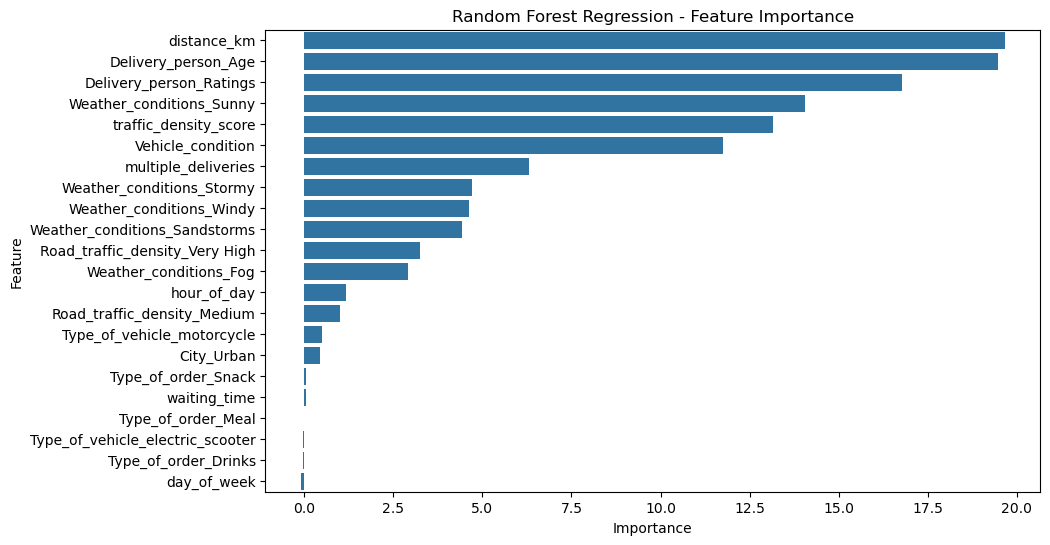

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_perm_rf_reg)
plt.title('Random Forest Regression - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Feature Importance XGBoost Regression
df_perm_xgb_reg = pd.DataFrame({'Feature': X_test_ema_reg.columns, 'Importance': perm_xgb_reg.importances_mean}).sort_values(by='Importance', ascending=False)
df_perm_xgb_reg.head()

Feature  Importance
7                distance_km   24.649061
0        Delivery_person_Age   21.737874
12  Weather_conditions_Sunny   16.830566
1    Delivery_person_Ratings   14.734791
8      traffic_density_score   13.603390

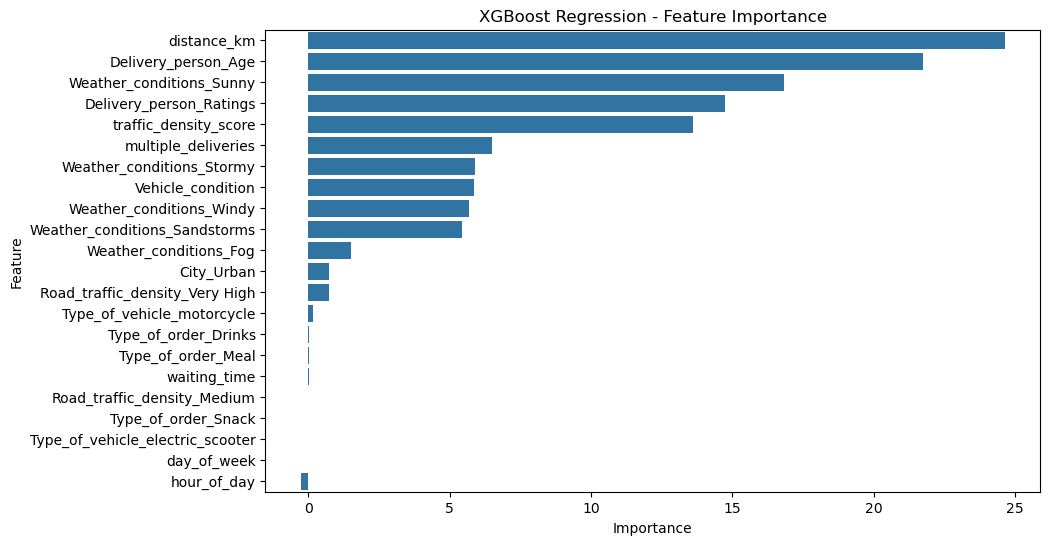

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_perm_xgb_reg)
plt.title('XGBoost Regression - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Feature Importance Classification

In [ ]:
# Feature Importance RandomForest Classification
df_perm_rf_clas = pd.DataFrame({'Feature': X_test_ema_clas.columns, 'Importance': perm_rf_clas.importances_mean}).sort_values(by='Importance', ascending=False)
df_perm_rf_clas.head()

Feature  Importance
1    Delivery_person_Ratings    0.227374
7                distance_km    0.087888
8      traffic_density_score    0.069938
12  Weather_conditions_Sunny    0.058538
2          Vehicle_condition    0.046985

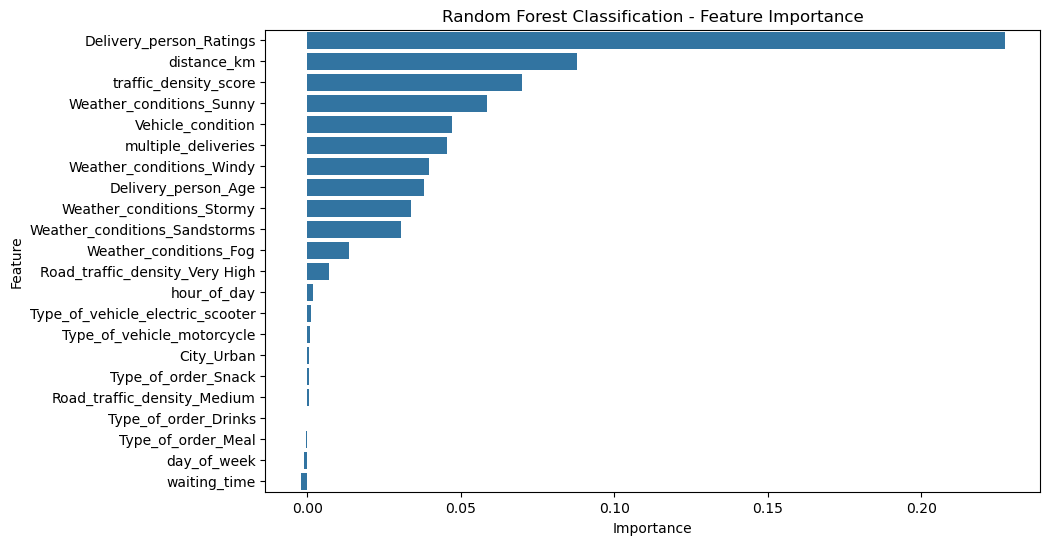

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_perm_rf_clas)
plt.title('Random Forest Classification - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Feature Importance XGBoost Classification
df_perm_xgb_clas = pd.DataFrame({'Feature': X_test_ema_clas.columns, 'Importance': perm_xgb_clas.importances_mean}).sort_values(by='Importance', ascending=False)
df_perm_xgb_clas.head()

Feature  Importance
1    Delivery_person_Ratings    0.209706
7                distance_km    0.099600
8      traffic_density_score    0.082979
12  Weather_conditions_Sunny    0.071202
2          Vehicle_condition    0.050548

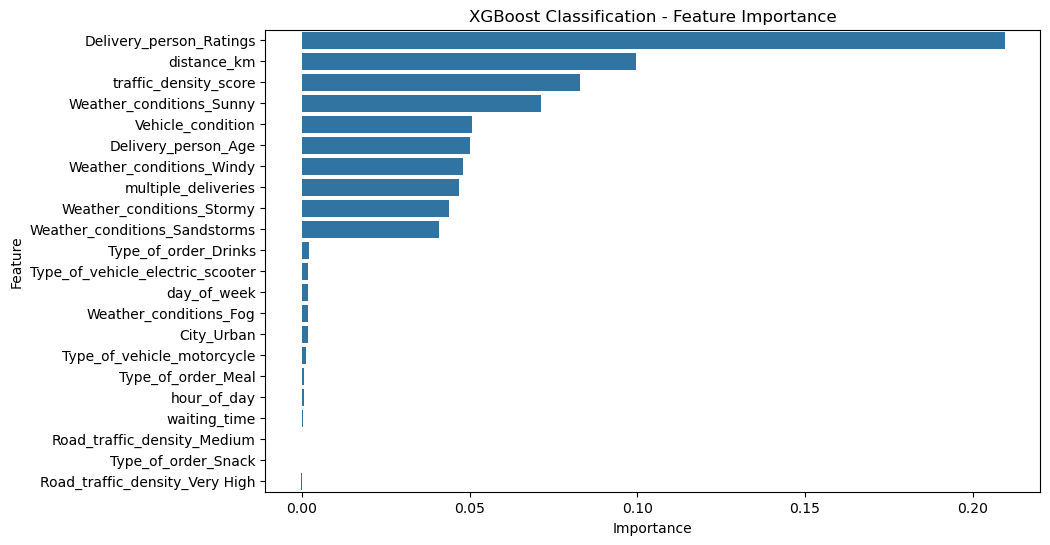

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_perm_xgb_clas)
plt.title('XGBoost Classification - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**SHAP (Shapley Additive Explanations)**<br>
Memberikan interpretasi kontribusi masing-masing fitur terhadap prediksi model.

In [ ]:
import shap

In [ ]:
# Take 500 samples from X_test_ema_reg and X_test_ema_clas
X_sample_reg  = X_test_ema_reg.sample(n=200, random_state=42)
X_sample_clas = X_test_ema_clas.sample(n=200, random_state=42)

SHAP (SHapley Additive exPlanations) Regression


In [ ]:
# SHAP RandomForest Regression
explainer_rf_reg = shap.Explainer(best_rf_reg_model)
shap_values_rf_reg = explainer_rf_reg(X_sample_reg.values)

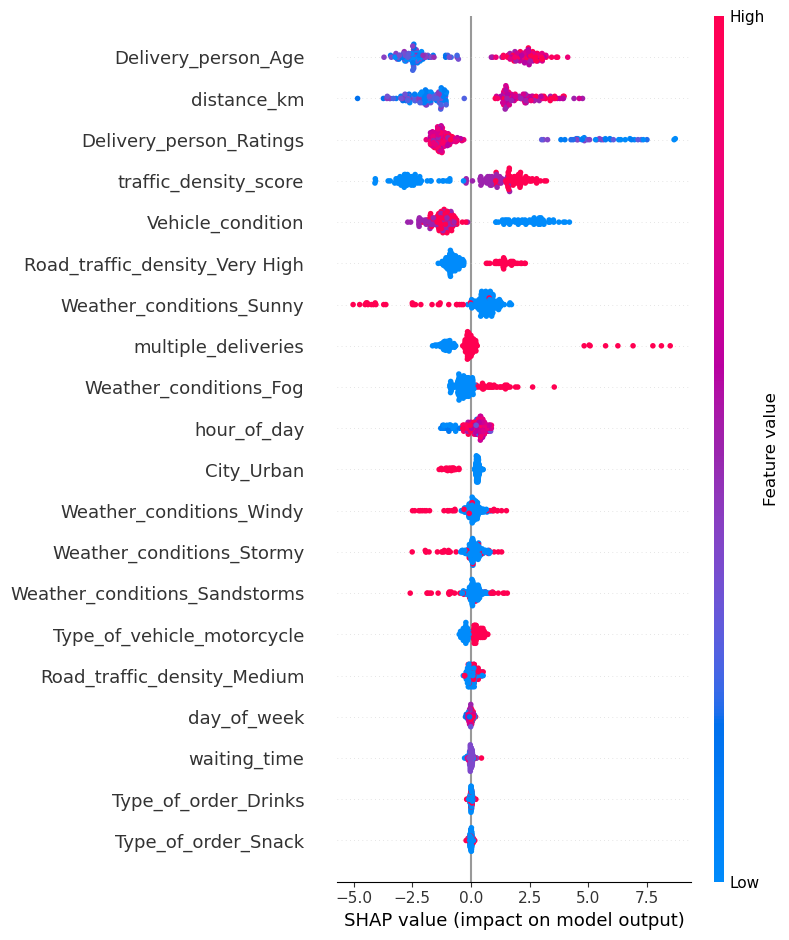

In [ ]:
shap.summary_plot(shap_values_rf_reg, features=X_sample_reg, feature_names=X_sample_reg.columns)

In [ ]:
# SHAP XGBoost Regression
explainer_xgb_reg = shap.Explainer(best_xgb_reg_model)
shap_values_xgb_reg = explainer_xgb_reg(X_sample_reg.values)

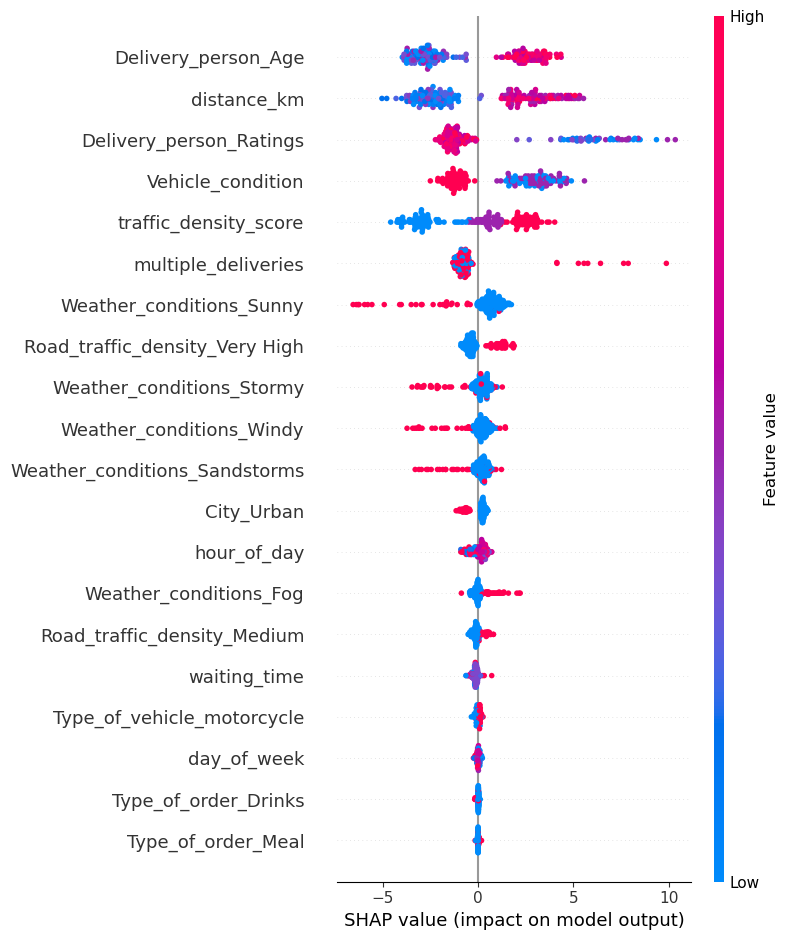

In [ ]:
shap.summary_plot(shap_values_xgb_reg, features=X_sample_reg, feature_names=X_sample_reg.columns)

SHAP (SHapley Additive Planations) Classification

In [ ]:
# SHAP RandomForest Classification
explainer_rf_clas = shap.Explainer(best_rf_class_model)
shap_values_rf_clas = explainer_rf_clas(X_sample_clas.values)

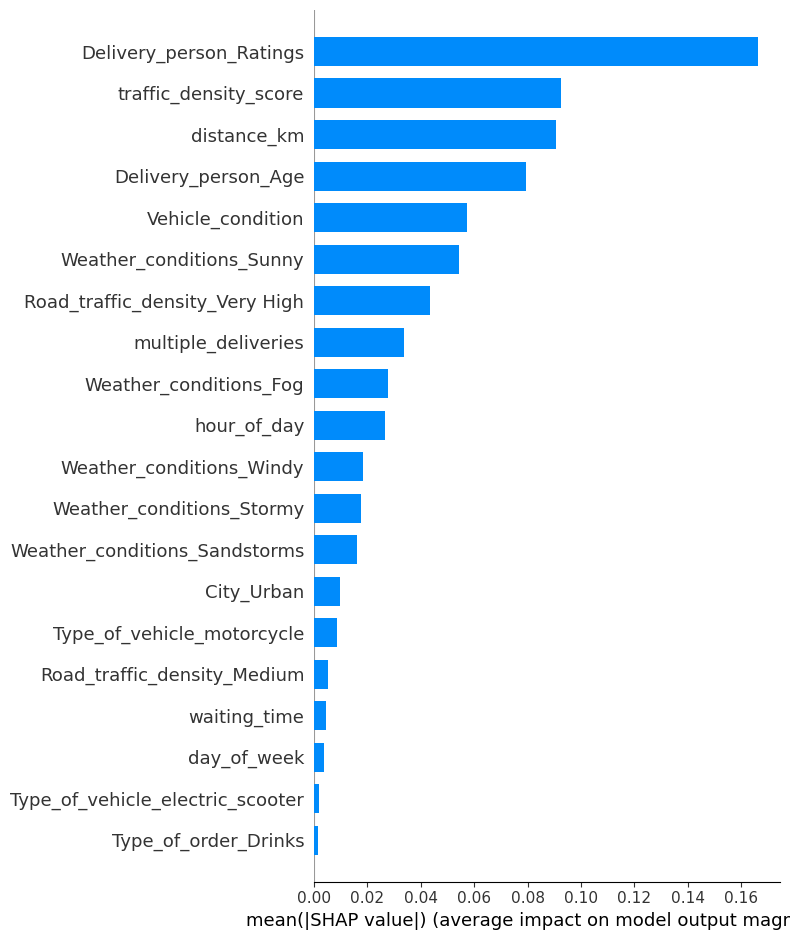

In [ ]:
shap.summary_plot(shap_values_rf_clas[..., 1], features=X_sample_clas, feature_names=X_sample_clas.columns, plot_type="bar")


In [ ]:
# SHAP XGBoost Classification
explainer_xgb_clas = shap.Explainer(best_xgb_class_model)
shap_values_xgb_clas = explainer_xgb_clas(X_sample_clas.values)

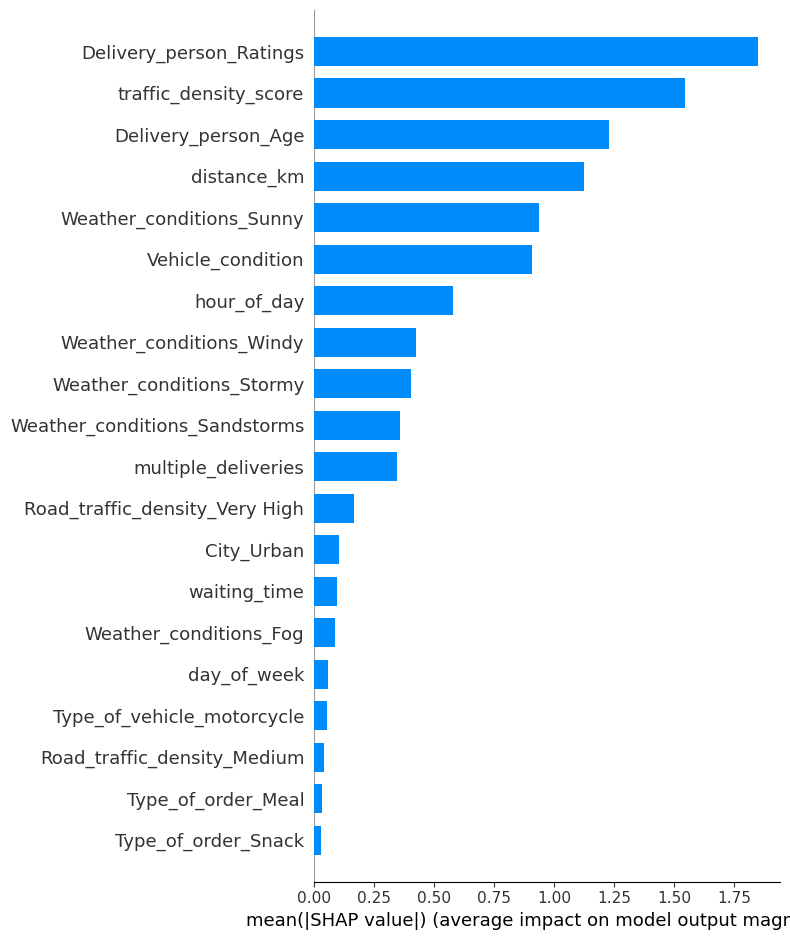

In [ ]:
shap.summary_plot(shap_values_xgb_clas, features=X_sample_clas, feature_names=X_sample_clas.columns, plot_type="bar")

## `EVALUATION INTERPRETATION`

### Model Regression

Model RandomForest Regression :
- MAE (Mean Absolute Error): 3.33 → Rata-rata kesalahan 3.33 menit.
- RMSE (Root Mean Squared Error): 4.18 → Error prediksi kecil dan stabil.
- MAPE (Mean Absolute Percentage Error): 14.68% → Rata-rata kesalahan relatif  cukup kecil.
- R² (0.80) → Model mampu menjelaskan 80% variasi dalam durasi pengiriman.

Model XGBosst Regression :
- MAE (Mean Absolute Error): 4.43 → Rata-rata error 4.43 menit.
- RMSE (Root Mean Squared Error): 5.80 → Error prediksi cukup kecil dan masih stabil.
- MAPE (Mean Absolute Percentage Error): 20.2% → Rata-rata kesalahan relatif cukup besar.
- R² (0.61) → Model mampu menjelaskan 61% variasi dalam durasi pengiriman.

### Model Classification

Model RandomForest Classification :
- TP = 1175, FN = 185 → Model berhasil mengenali sebagian besar pengiriman lambat (kategori 1), namun masih melewatkan 185 kasus (recall = 0.86).
- FP = 118, TN = 3081 → Hanya sedikit pengiriman cepat yang salah diklasifikasikan sebagai lambat (precision kategori lambat = 0.91).
- F1-score lambat = 0.89 → Seimbang antara presisi & sensitivitas.
- Accuracy = 93.3% → Performa keseluruhan sangat baik.

Model XGBoost Classification :
- TP = 1238, FN = 122 → Model mengenali pengiriman lambat (kategori 1), dengan recall tinggi (0.91).
- FP = 208, TN = 1238 → Ada sejumlah pengiriman cepat yang salah diklasifikasikan sebagai lambat, precision kategori lambat tetap baik (0.86).
- F1-score lambat = 0.88 → Seimbang antara presisi dan sensitivitas.
- Accuracy = 92.7% → Performa model secara keseluruhan tergolong sangat baik.

### Evaluation and Recommendations

Analisis ini mencakup dua pendekatan: regresi untuk memperkirakan durasi pengiriman (dalam menit), dan klasifikasi untuk mengidentifikasi pengiriman lambat (Slow Delivery, kelas 1).

Model Regresi pada RandomForest menunjukkan performa yang lebih baik dibandingkan XGBoost. Dengan MAE 3.33 menit dan R² 0.80, model ini mampu memperkirakan durasi pengiriman secara lebih akurat. Sedangkan, XGBoost mencatat MAE 4.43 menit dan R² 0.61, yang menunjukkan akurasi prediksi yang lebih rendah.

Pada klasifikasi, fokus utama adalah Recall untuk kelas 1 karena tujuan utamanya adalah mendeteksi pengiriman lambat. Kedua model memiliki akurasi yang tinggi (93.3% untuk RandomForest dan 92.7% untuk XGBoost), namun XGBoost lebih unggul dalam mendeteksi pengiriman lambat dengan Recall 0.91, dibandingkan RandomForest yang mencatat Recall 0.86. Meski precision dan F1-score XGBoost sedikit lebih rendah, performa klasifikasinya tetap sangat baik.

Secara keseluruhan:

- RandomForest lebih direkomendasikan untuk analisis regresi (memperkirakan durasi pengiriman).
- XGBoost lebih direkomendasikan untuk analisis klasifikasi pengiriman lambat (Slow Delivery) karena Recall yang lebih tinggi.

### Explanatory Model Analysis (EMA)

⏱️Regression (Estimasi Waktu Pengiriman - dalam menit)

| **Kategori Fitur**        | **RandomForest**                                                                                          | **XGBoost**                                                                                     | **Kesimpulan**                                                                                                                              |
| ------------------------- | --------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **Top 3 Fitur Utama**     | distance\_km, Delivery\_person\_Age, Delivery\_person\_Ratings                                            | distance\_km, Delivery\_person\_Age, Weather\_conditions\_Sunny                                 | Jarak tempuh dan usia pengantar adalah faktor dominan pada kedua model.                     |
| **Fitur Penting Lainnya** | Weather\_conditions\_Sunny, traffic\_density\_score, Vehicle\_condition, multiple\_deliveries             | traffic\_density\_score, Delivery\_person\_Ratings, multiple\_deliveries, Stormy                | Kepadatan lalu lintas dan kondisi kendaraan berkontribusi signifikan; jumlah pengantaran berganda juga berdampak moderat.                   |
| **Fitur Minim/Pelemah**   | hour\_of\_day, waiting\_time, beberapa kategori dengan nilai negatif (day\_of\_week, jenis order/vehicle) | waiting\_time, day\_of\_week, beberapa kategori very low/negatif                                | Variasi jam pengantaran dan waktu tunggu memiliki pengaruh sangat kecil atau negatif, sehingga relatif kurang relevan untuk estimasi waktu. |
| **Perbedaan Model**       | Memasukkan lebih banyak kategori cuaca/road\_traffic dengan bobot rendah-negatif                          | Lebih fokus pada jarak, usia, rating, dan cuaca cerah; penalti fitur negatif hampir tidak ada   | RandomForest menangkap lebih banyak interaksi fitur kategorikal minor, sedangkan XGBoost lebih terpusat pada fitur kuantitatif utama.       |
| **Hubungan Umum**         | Fitur kuantitatif (jarak, usia, rating) mendominasi; fitur kategorikal dampaknya menengah–rendah          | Pola serupa: fitur kuantitatif kuat, cuaca cerah lebih berpengaruh daripada kategori cuaca lain | Untuk regresi waktu pengiriman, optimasi variabel jarak dan kondisi pengantar (usia, rating) paling krusial dalam model.                    |


🚚 Classification (Kategori Cepat dan Lambat Pengiriman)

| **Kategori Fitur**        | **RandomForest**                                                                                           | **XGBoost**                                                                          | **Kesimpulan**                                                                                                                                              |
| ------------------------- | ---------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Top 3 Fitur Utama**     | Delivery\_person\_Ratings, distance\_km, traffic\_density\_score                                           | Delivery\_person\_Ratings, distance\_km, traffic\_density\_score                     | Rating pengantar, jarak, dan kepadatan lalu lintas paling menentukan kategori kecepatan pengiriman di kedua model.                                          |
| **Fitur Penting Lainnya** | Weather\_conditions\_Sunny, Vehicle\_condition, multiple\_deliveries, windy                                | Weather\_conditions\_Sunny, Vehicle\_condition, multiple\_deliveries, Stormy         | Cuaca cerah dan kondisi kendaraan berperan sedang; pengantaran berganda juga mempengaruhi klasifikasi.                                                      |
| **Fitur Minim/Pelemah**   | hour\_of\_day, Type\_of\_vehicle\_electric\_scooter, beberapa fitur negatif (waiting\_time, day\_of\_week) | waiting\_time, day\_of\_week, beberapa fitur very low/negatif                        | Variabel waktu dan beberapa kategori order/vehicle hampir tidak berkontribusi, bahkan menurunkan performa sedikit.                                          |
| **Perbedaan Model**       | Lebih menekankan rating dan jarak, namun menyertakan sedikit lebih banyak fitur kategorikal                | Sedikit lebih merata pada fitur kuantitatif, dengan penalti minimal pada fitur minor | Kedua model konsisten pada fitur utama; XGBoost cenderung lebih “bersih” tanpa bobot negatif, sedangkan RandomForest memasukkan noise kecil fitur kategori. |
| **Hubungan Umum**         | Fitur kuantitatif utama (rating, jarak, traffic) paling dominan; kategori cuaca menengah                   | Pola serupa: rating dan jarak paling kuat, fitur kategori lainnya relatif rendah     | Untuk klasifikasi kategori waktu, fokus pada meningkatkan kualitas rating dan optimasi rute (jarak & kepadatan lalu lintas) akan paling efektif.            |


### Business Recommendations

⏱️Regression (Estimasi Waktu Pengiriman – menit

| **Rekomendasi Bisnis**          | **Tindakan & Penjelasan**                                                                                                                                        |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1. Optimalkan Rute & Jarak      | • Terapkan route‑optimization (penghematan jarak → pengurangan waktu rata‑rata).<br>• Insentif driver dengan jarak tempuh paling efisien (bonus per km optimal). |
| 2. Tingkatkan Rating Pengantar  | • Kumpulkan feedback pasca‑antar (meningkatkan akurasi ETA via data real).<br>• Reward driver rating ≥ 4.8 (motivasi kualitas layanan).                          |
| 3. Buffer untuk Cuaca & Traffic | • Tambah 10–15 % buffer ETA saat hujan/badai (mengurangi under‑promise).<br>• Sesuaikan rute pakai data real‑time traffic (hindari kemacetan).                   |
| 4. Kendaraan & Batch Delivery   | • Inspeksi & subsidi perawatan kendaraan (pastikan kondisi prima → stabilitas waktu).<br>• Konsolidasi order berdekatan, batasi 3–4 paket per batch (efisiensi). |


🚚 Classification (Kategori Cepat dan Lambat Pengiriman)

| **Rekomendasi Bisnis**      | **Tindakan & Penjelasan**                                                                                                                                                 |
| --------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1. Prioritas Rating & Jarak | • Jadwalkan driver rating tinggi di rute pendek (memaksimalkan peluang “Fast”).<br>• Model klasifikasi memetakan jarak → kategori kecepatannya.                           |
| 2. Fast Delivery Berbayar   | • Tawarkan SLA < 30 mnt dengan harga premium (segmen pelanggan butuh cepat).<br>• Sesuaikan harga/promosi berdasarkan akurasi model (dynamic pricing).                    |
| 3. Penyesuaian Dynamic Slot | • Dorong slot off‑peak dengan diskon (mengurangi beban puncak).<br>• Alihkan pengiriman “Fast” ke rute alternatif saat traffic padat (jaga konsistensi).                  |
| 4. Reward & Retrain Model   | • Beri reward untuk driver yang konsisten “Fast” (tingkatkan retensi performa).<br>• Kumpulkan feedback pelanggan & retrain model tiap kuartal (perbaikan berkelanjutan). |
